In [55]:
import os

In [56]:
%cd drive/MyDrive/AI_ML_CLass/upgrad/PROJETS/

[Errno 2] No such file or directory: 'drive/MyDrive/AI_ML_CLass/upgrad/PROJETS/'
/content/drive/MyDrive/AI_ML_CLass/upgrad/PROJETS


In [57]:
!ls

aus_housing_price_data_description.txt	    submission_adaboost.csv
Aus-Housing-price.ipynb			    submission.csv
aus_housing_pricing.csv			    submission.gsheet
bike_sharing.csv			    submission_random.csv
bike-sharing-data-dict.txt		    telecom_churn_data_dictionary.csv
Bike-Sharing-Linear-Regression.ipynb	    Telecom-churn-Forecasting.ipynb
cleaned_high_profile_churn.csv		    telecom_churn_test_solution.csv
Lending-Case-Study-EDA.ipynb		    telecom_churn_train.csv
lending_loan_data_dictionary.xlsx	    telecome_churn_test.csv
Linear_Regression_Subjective_Questions.pdf  telecome_churn_test.gsheet
loan.csv


### Importing Libs

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,precision_recall_curve,roc_curve,f1_score,auc
from sklearn.decomposition import PCA

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings('ignore')

### Loading Churn Train Data & get into insight data :

In [59]:
churn_df=pd.read_csv('telecom_churn_train.csv')

In [60]:
churn_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [61]:
churn_df.shape

(69999, 172)

In [62]:
# data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [63]:
# displaying columns with class type
churn_df.dtypes

id                            int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            

In [64]:
# disription of churn columns
with open("telecom_churn_data_dictionary.csv","r") as f :
  for nl in f.readlines() :
    print(nl)

Acronyms,Description

CIRCLE_ID,Telecom circle area to which the customer belongs to

LOC,Local calls  within same telecom circle

STD,STD calls  outside the calling circle

IC,Incoming calls

OG,Outgoing calls

T2T,Operator T to T ie within same operator mobile to mobile

T2M    ,Operator T to other operator mobile

T2O    ,Operator T to other operator fixed line

T2F    ,Operator T to fixed lines of T

T2C    ,Operator T to its own call center

ARPU    ,Average revenue per user

MOU    ,Minutes of usage  voice calls

AON    ,Age on network  number of days the customer is using the operator T network

ONNET   ,All kind of calls within the same operator network

OFFNET    ,All kind of calls outside the operator T network

ROAM,Indicates that customer is in roaming zone during the call

SPL   ,Special calls

ISD    ,ISD calls

RECH    ,Recharge

NUM    ,Number

AMT    ,Amount in local currency

MAX    ,Maximum

DATA    ,Mobile internet

3G    ,G network

AV    ,Average

VOL    ,Mobile i

In [65]:
dist_df=churn_df.describe().transpose()
dist_df

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


observation :

1. Nature of data distribution of all features columns are skew. 
2. There are many features which having only an unique value. Since These column does not contribute in model building, We should need to drop those features.
3. we can also observe feature columns contain lot of outliers datapoints


### Data Cleaning : 

In [66]:
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(churn_df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


#### Missing Value Treatment

In [67]:
# calculate percentage of missing value against each column

def missing_percetage(df) :
  percentage = df.isna().sum().sort_values(ascending=False)*100/df.shape[0]
  return pd.DataFrame({'features':percentage.index,'percentage':percentage.values})

missing_df=missing_percetage(churn_df).head(200)
missing_df.head(200)

,features,percentage
0,arpu_3g_6,74.902499
1,count_rech_2g_6,74.902499
2,night_pck_user_6,74.902499
3,arpu_2g_6,74.902499
4,date_of_last_rech_data_6,74.902499
5,total_rech_data_6,74.902499
6,av_rech_amt_data_6,74.902499
7,max_rech_data_6,74.902499
8,count_rech_3g_6,74.902499
9,fb_user_6,74.902499


obeservation : 

1.   More than 73% missing values has been found in each of 30 columns in dataset.
2.  There are around 122 columns which having missing values



In [68]:
# drop colums which having more than 73% missing value
drop_cols = missing_df[missing_df.percentage>73].features.to_list()
churn_df.drop(drop_cols,inplace=True,axis=1)
# shape after dropping columns
churn_df.shape

(69999, 142)

In [69]:
# removing row data which having date related missing value
cols = ['date_of_last_rech_8',
        'date_of_last_rech_7',
        'date_of_last_rech_6',
        'last_date_of_month_8',
        'last_date_of_month_7'
        ]
churn_df=churn_df.dropna(subset=cols,how='any')

In [70]:
# listing columns having missing value less than equal to 6% 
missing_df = missing_percetage(churn_df)
missing_df = missing_df[missing_df.percentage > 0.0 ]
missing_df.head(200)

,features,percentage
0,loc_og_t2c_mou_8,3.316400
1,isd_og_mou_8,3.316400
2,loc_og_mou_8,3.316400
3,std_og_t2m_mou_8,3.316400
4,std_og_t2f_mou_8,3.316400
5,loc_og_t2f_mou_8,3.316400
6,std_ic_t2f_mou_8,3.316400
7,std_ic_t2t_mou_8,3.316400
8,loc_og_t2m_mou_8,3.316400
9,std_og_t2c_mou_8,3.316400


In [71]:
# look into columns having missing value less than equal to 6% and greater than 0%
churn_df[missing_df.features.to_list()].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loc_og_t2c_mou_8,63758.0,1.438439,6.623298,0.0,0.0000,0.000,0.0000,351.83
isd_og_mou_8,63758.0,0.852881,30.108189,0.0,0.0000,0.000,0.0000,5681.54
loc_og_mou_8,63758.0,142.923404,246.651865,0.0,18.3100,65.240,168.9400,11039.91
std_og_t2m_mou_8,63758.0,91.429979,270.490839,0.0,0.0000,3.510,53.8600,13950.04
std_og_t2f_mou_8,63758.0,1.054962,7.737241,0.0,0.0000,0.000,0.0000,354.16
loc_og_t2f_mou_8,63758.0,3.690321,13.099604,0.0,0.0000,0.000,2.0600,588.29
std_ic_t2f_mou_8,63758.0,2.081837,16.039237,0.0,0.0000,0.000,0.0000,1394.89
std_ic_t2t_mou_8,63758.0,9.972515,52.636553,0.0,0.0000,0.000,4.1600,3423.39
loc_og_t2m_mou_8,63758.0,92.712035,153.126836,0.0,10.5300,41.635,111.5875,4961.33
std_og_t2c_mou_8,63758.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00


observation :

1. Data Distribution of almost all columns are skew.
2. Major gap in value of mean and Median of all columns.So I will replace those missing value with median.
3. There are also some column which contain only zero or na value.Those columns are [std_og_t2c_mou_8,std_ic_t2o_mou_8,std_og_t2c_mou_6,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_og_t2c_mou_7,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou]
4. They are continuous features.

In [72]:
# droping columns which having only zero or nan value
cols=['std_og_t2c_mou_8','std_ic_t2o_mou_8','std_og_t2c_mou_6','std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7','std_og_t2c_mou_7','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
churn_df.drop(columns=cols,axis=1,inplace=True)

In [73]:
# columns names which of na values are going to replace with median 
# it is mandatory for preprocessing of test data
missing_median_replaced_col=churn_df.isna().sum()[churn_df.isna().sum()>0].index.to_list()
missing_median=churn_df[missing_median_replaced_col].median()

In [74]:
# replacing rest of missing value with median
churn_df[missing_median_replaced_col] = churn_df[missing_median_replaced_col].fillna(missing_median)

In [75]:
# checking missing value
churn_df.isna().sum()

id                      0
circle_id               0
last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_m

In [76]:
churn_df.shape

(65945, 133)

In [77]:
# dropping id 
churn_df.drop(columns=['id'],axis=1,inplace=True)
churn_df=churn_df.reset_index()

In [78]:
churn_df.drop(columns=['index'],axis=1,inplace=True)

### EDA :

In [79]:
churn_df.head()

,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,109,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,109,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,109,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,109,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44

In [80]:
# looking into date feature columns
## Listing Unique Value of each date  features
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
for col in date_cols :
  print(f"date feature colum {col} ==> ",churn_df[col].unique())

date feature colum last_date_of_month_6 ==>  ['6/30/2014']
date feature colum last_date_of_month_7 ==>  ['7/31/2014']
date feature colum last_date_of_month_8 ==>  ['8/31/2014']
date feature colum date_of_last_rech_6 ==>  ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' '6/8/2014' '6/6/2014' '6/16/2014'
 '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/7/2014' '6/2/2014'
 '6/1/2014' '6/3/2014' '6/10/2014' '6/5/2014' '6/9/2014' '6/4/2014']
date feature colum date_of_last_rech_7 ==>  ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014' '7/12/2014'
 '7/24/2014' '7/1/2014' '7/15/2014' '7/23/2014' '7/9/2014' '7/8/2014'
 '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014' '7/2/2014'
 '7/3/2014']
date fea

It is visible here, that column last date of month 6,7,8 have constant date.

In [81]:
# datetime conversion
for col in date_cols :
  churn_df[col]=pd.to_datetime(churn_df[col])

# creating new feature that tells gap b/w last date of particualr month and last recharge date for particular month in days
churn_df['last_rech_gap_month_6'] = (churn_df['last_date_of_month_6']-churn_df['date_of_last_rech_6']).astype('timedelta64[D]')
churn_df['last_rech_gap_month_7'] = (churn_df['last_date_of_month_7']-churn_df['date_of_last_rech_7']).astype('timedelta64[D]')
churn_df['last_rech_gap_month_8'] = (churn_df['last_date_of_month_8']-churn_df['date_of_last_rech_8']).astype('timedelta64[D]')

# drop date columns
churn_df.drop(columns=date_cols,axis=1,inplace=True)

print("shape after dropping date colums ",churn_df.shape)

shape after dropping date colums  (65945, 129)


In [82]:
# Numeric & Categorical feature for EDA

# Since It is binary classfication problem, so target column churn_probability does having two categorical value 0 and 1. 
# 1 meaning customer is going to churn and zero means 
target_col = 'churn_probability'
print(f"target column ---> {target_col}")

# categorical features 
cat_cols = ['circle_id']
print(f"Categorical Features ---> {cat_cols}")

# countinuous Features
num_cols = list(set(churn_df.columns) - set(['churn_probability','circle_id']))
print(f"Numerical Features ---> {num_cols}")

target column ---> churn_probability
Categorical Features ---> ['circle_id']
Numerical Features ---> ['last_rech_gap_month_8', 'std_og_t2f_mou_7', 'std_og_mou_6', 'loc_ic_t2f_mou_7', 'loc_og_t2f_mou_6', 'std_og_mou_8', 'total_og_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_t2f_mou_6', 'onnet_mou_8', 'loc_og_mou_7', 'sachet_3g_6', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_7', 'max_rech_amt_7', 'jul_vbc_3g', 'roam_ic_mou_7', 'jun_vbc_3g', 'og_others_7', 'last_day_rch_amt_6', 'monthly_3g_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'total_rech_num_7', 'aug_vbc_3g', 'sachet_3g_8', 'vol_2g_mb_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'spl_og_mou_6', 'vol_3g_mb_7', 'std_ic_t2t_mou_6', 'total_rech_amt_6', 'loc_ic_mou_8', 'arpu_6', 'roam_ic_mou_6', 'std_ic_t2f_mou_7', 'aon', 'loc_og_mou_8', 'last_rech_gap_month_7', 'og_others_8', 'total_rech_amt_8', 'std_ic_mou_7', 

In [83]:
# circle id
print("circle id unique values ==> ",churn_df.circle_id.value_counts())

churn_df.drop(columns=['circle_id'],axis=1,inplace=True)

print("shape after dropping circle_id column ==>",churn_df.shape)

circle id unique values ==>  109    65945
Name: circle_id, dtype: int64
shape after dropping circle_id column ==> (65945, 128)


Churn customer datapoints in percentage 8.256880733944953
-----------------


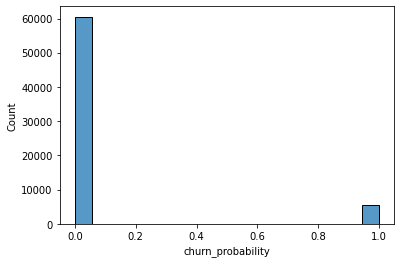

In [84]:
# check target column distribution
perc_churn_customer_datapoints = churn_df[churn_df.churn_probability==1].shape[0]*100/churn_df.shape[0]
print(f"Churn customer datapoints in percentage {perc_churn_customer_datapoints}")
print("-----------------")
sns.histplot(data=churn_df,x='churn_probability')

observation : 

1. Only 8.25% datapoints belong to positive churn.
2. It means It is a imbalanced classification problem

In [85]:
# null accuracy if we start saying all customer are in not churn category
churn_df[churn_df.churn_probability==0].shape[0]*100/churn_df.shape[0]

91.74311926605505

I will get 91.74 accuracy if I will categorize all datapoints as not churned. So It mean accuracy is not important matrix in model building process. 

In [86]:
def display_bulk_box_plot(df,num_cols,target_col,fig_size=(30,100)) :
  # box plot b/w target variable against different numerical columns
  plt.figure(figsize = fig_size)

  for i,col in enumerate(num_cols) :

      plt.subplot(44,3,i+1)
      sns.boxplot(x=target_col, y=col, data=df[[col,target_col]])
              
  plt.show()

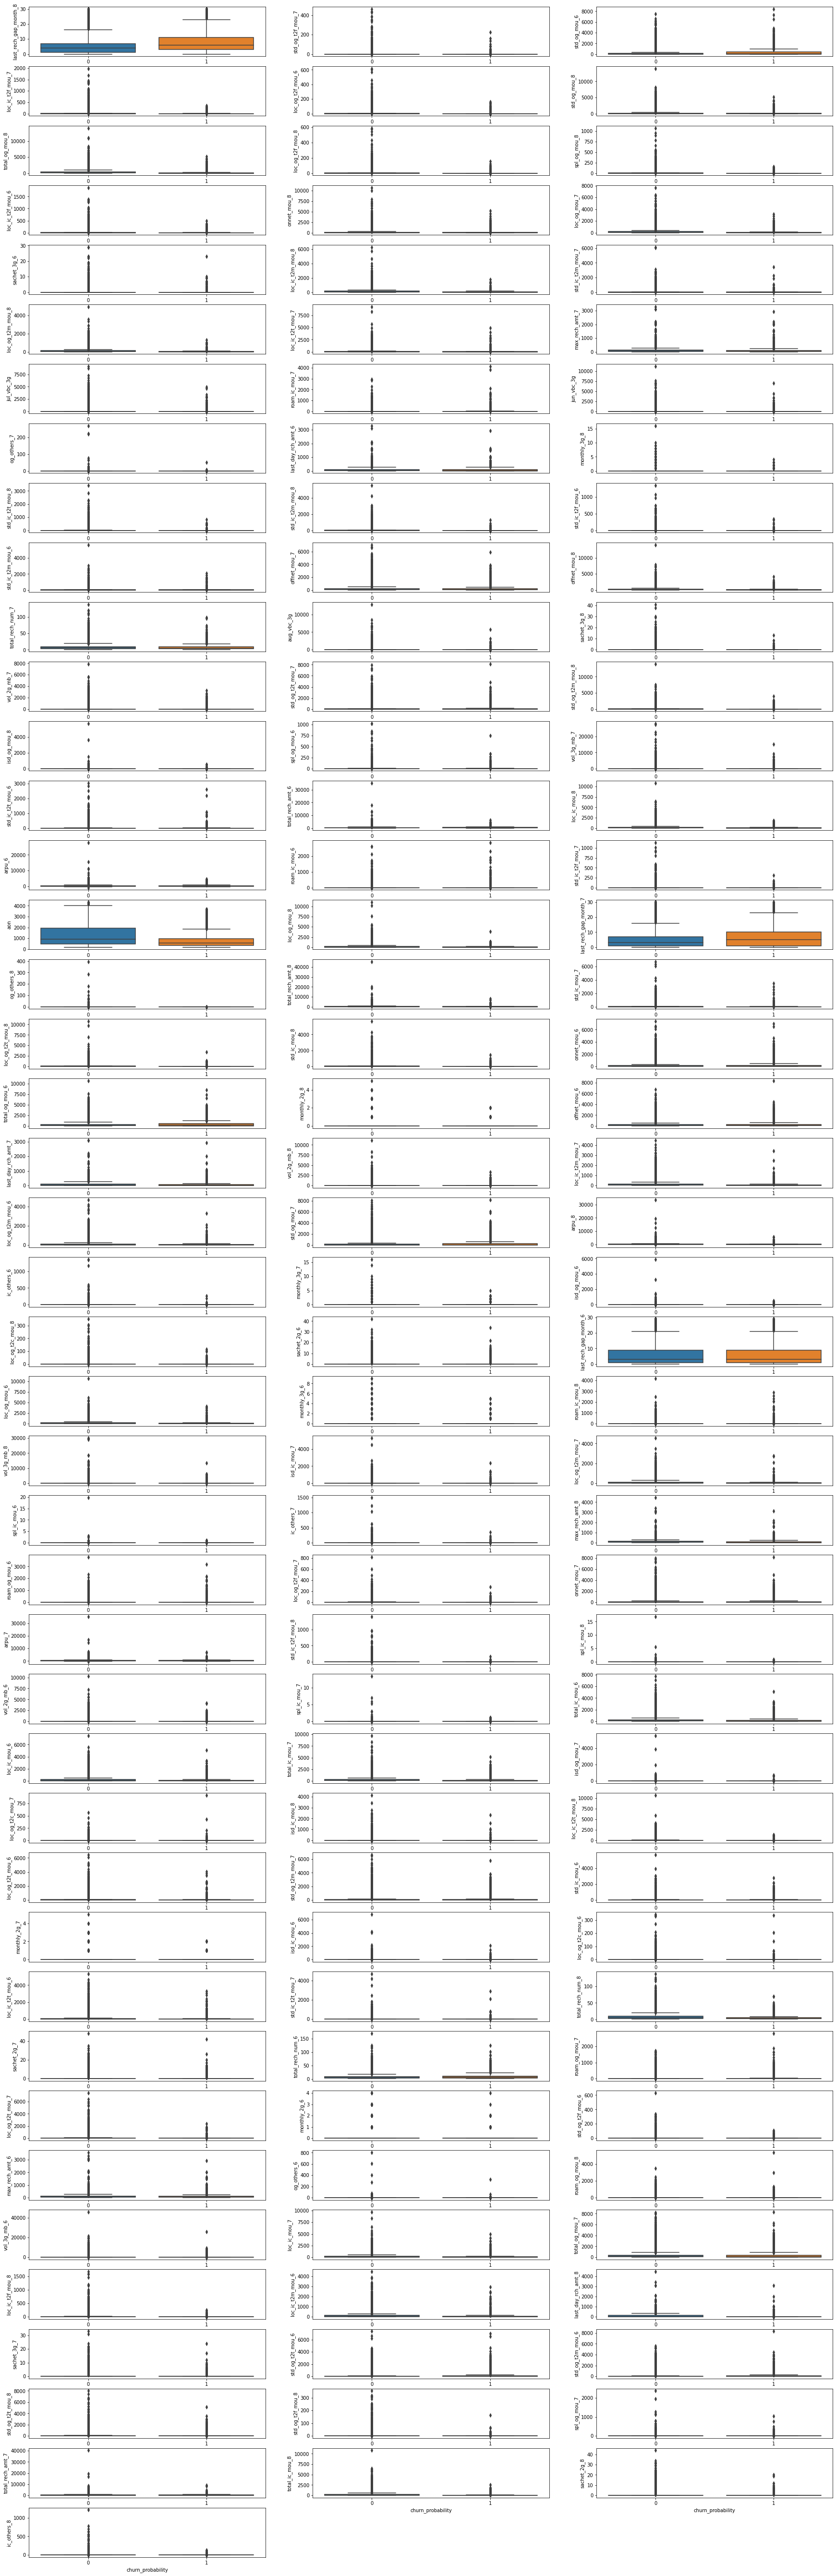

In [87]:
display_bulk_box_plot(df=churn_df,num_cols=num_cols,target_col=target_col)

Observation:

1. As per the Boxplot of all features except few contain outlier datapoints.
2. Q3 value of three new derived feature last_rech_gap_month_8,last_rech_gap_month_7 and last_rech_gap_month_6 are high for churn customer 
3. IQR range of aon feature is low for churn customer

In [88]:
def display_corr_heatmap(df) :

  # naive way 
  corr = df.corr()

  # corr
  plt.figure(figsize=(50,50))
  # Triangle Matrix
  mask = np.triu(np.ones_like(corr, dtype=np.bool))

  sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], mask=mask,
              cmap='PiYG', vmax=1.0, vmin=-1.0, 
              square=True);
    

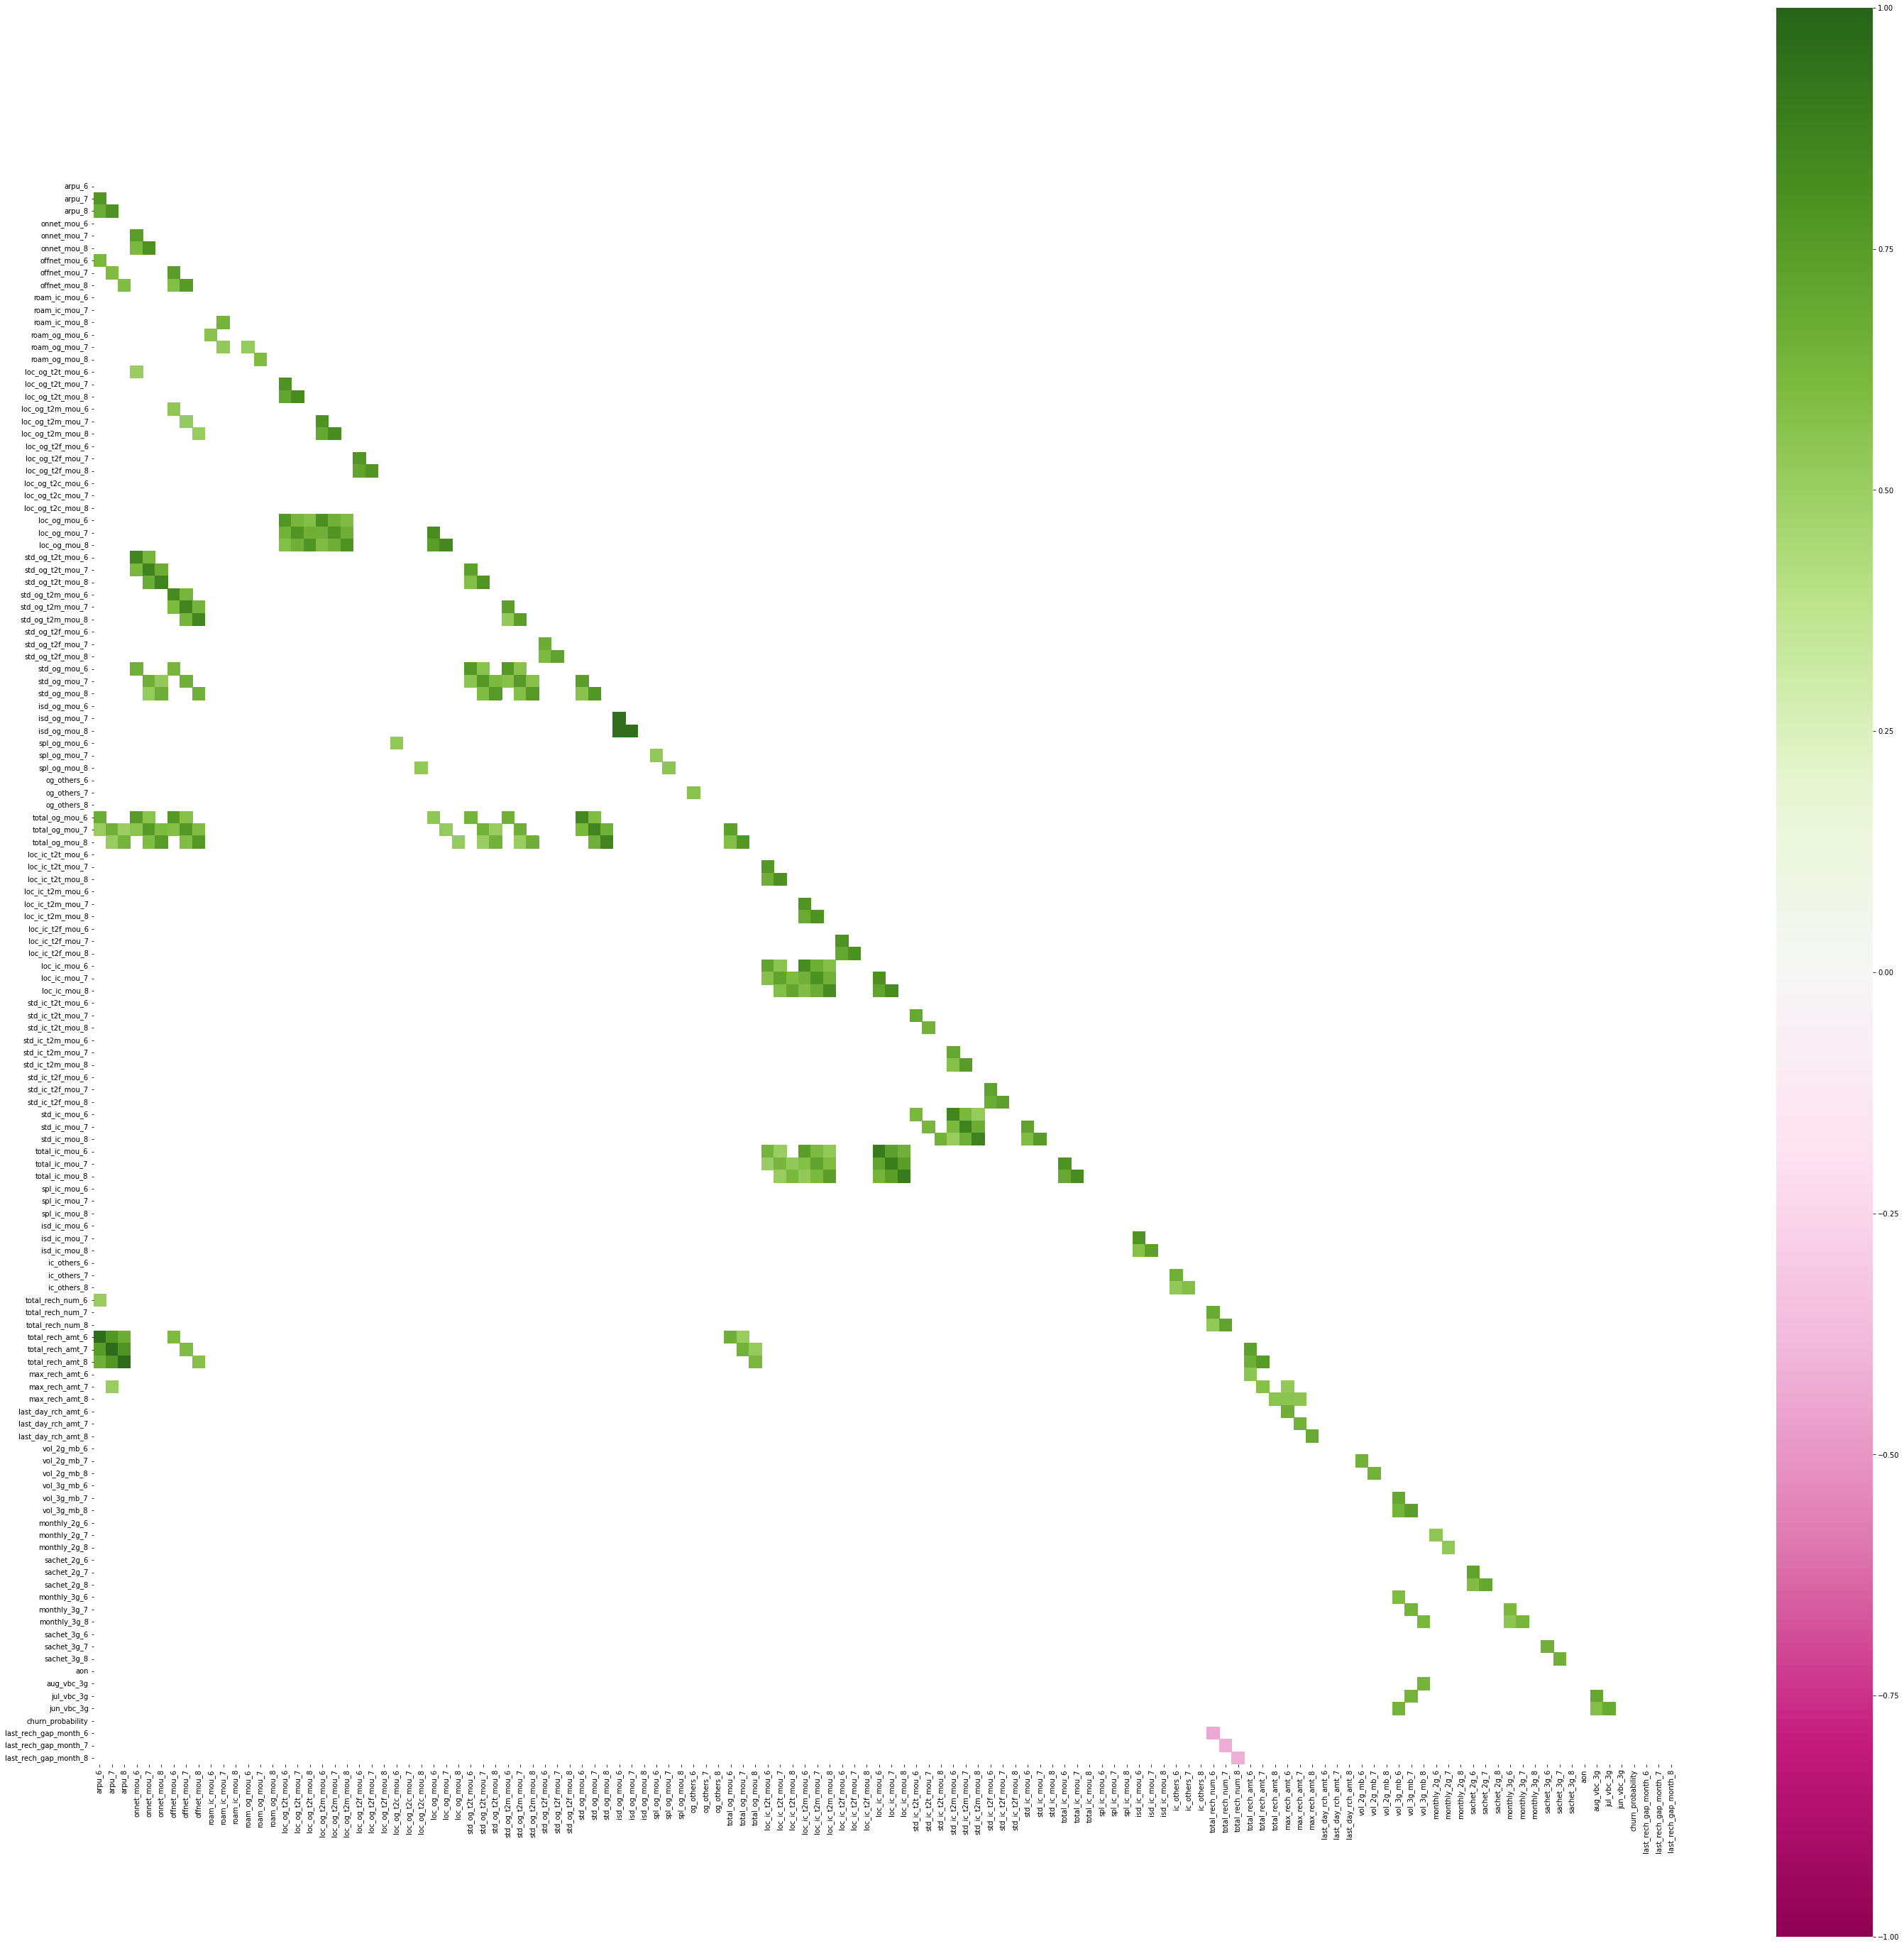

In [89]:
# plotting correlations on a heatmap
display_corr_heatmap(churn_df)

observation : many indepedent features are colinear to each other.

#### Outlier Treatment :

In [90]:
# since random forest is not sensitive to outlier, so keeping seperate copy of churn dataset
churn_df_w_outlier =  churn_df.copy()

In [91]:
# function to return upper limit & lower limit 
def outlier_val_func(x,q1,q3,iqr) :
  if x > q3+1.5*iqr :
    return q3+0.99*iqr
  elif x < q1-1.5*iqr :
    return  q1-0.99*iqr
  else :
    return x

# it is not wise to remove outlier,
# replacing higher & lower value with q3+0.99IQR and q1-0.99IQR
def outlier_rplc(df,func_rplc) :
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  iqr=q3-q1
  return df.apply(lambda x : func_rplc(x,q1,q3,iqr))

In [92]:
for col in num_cols :
  churn_df[col]=outlier_rplc(churn_df[col],outlier_val_func)

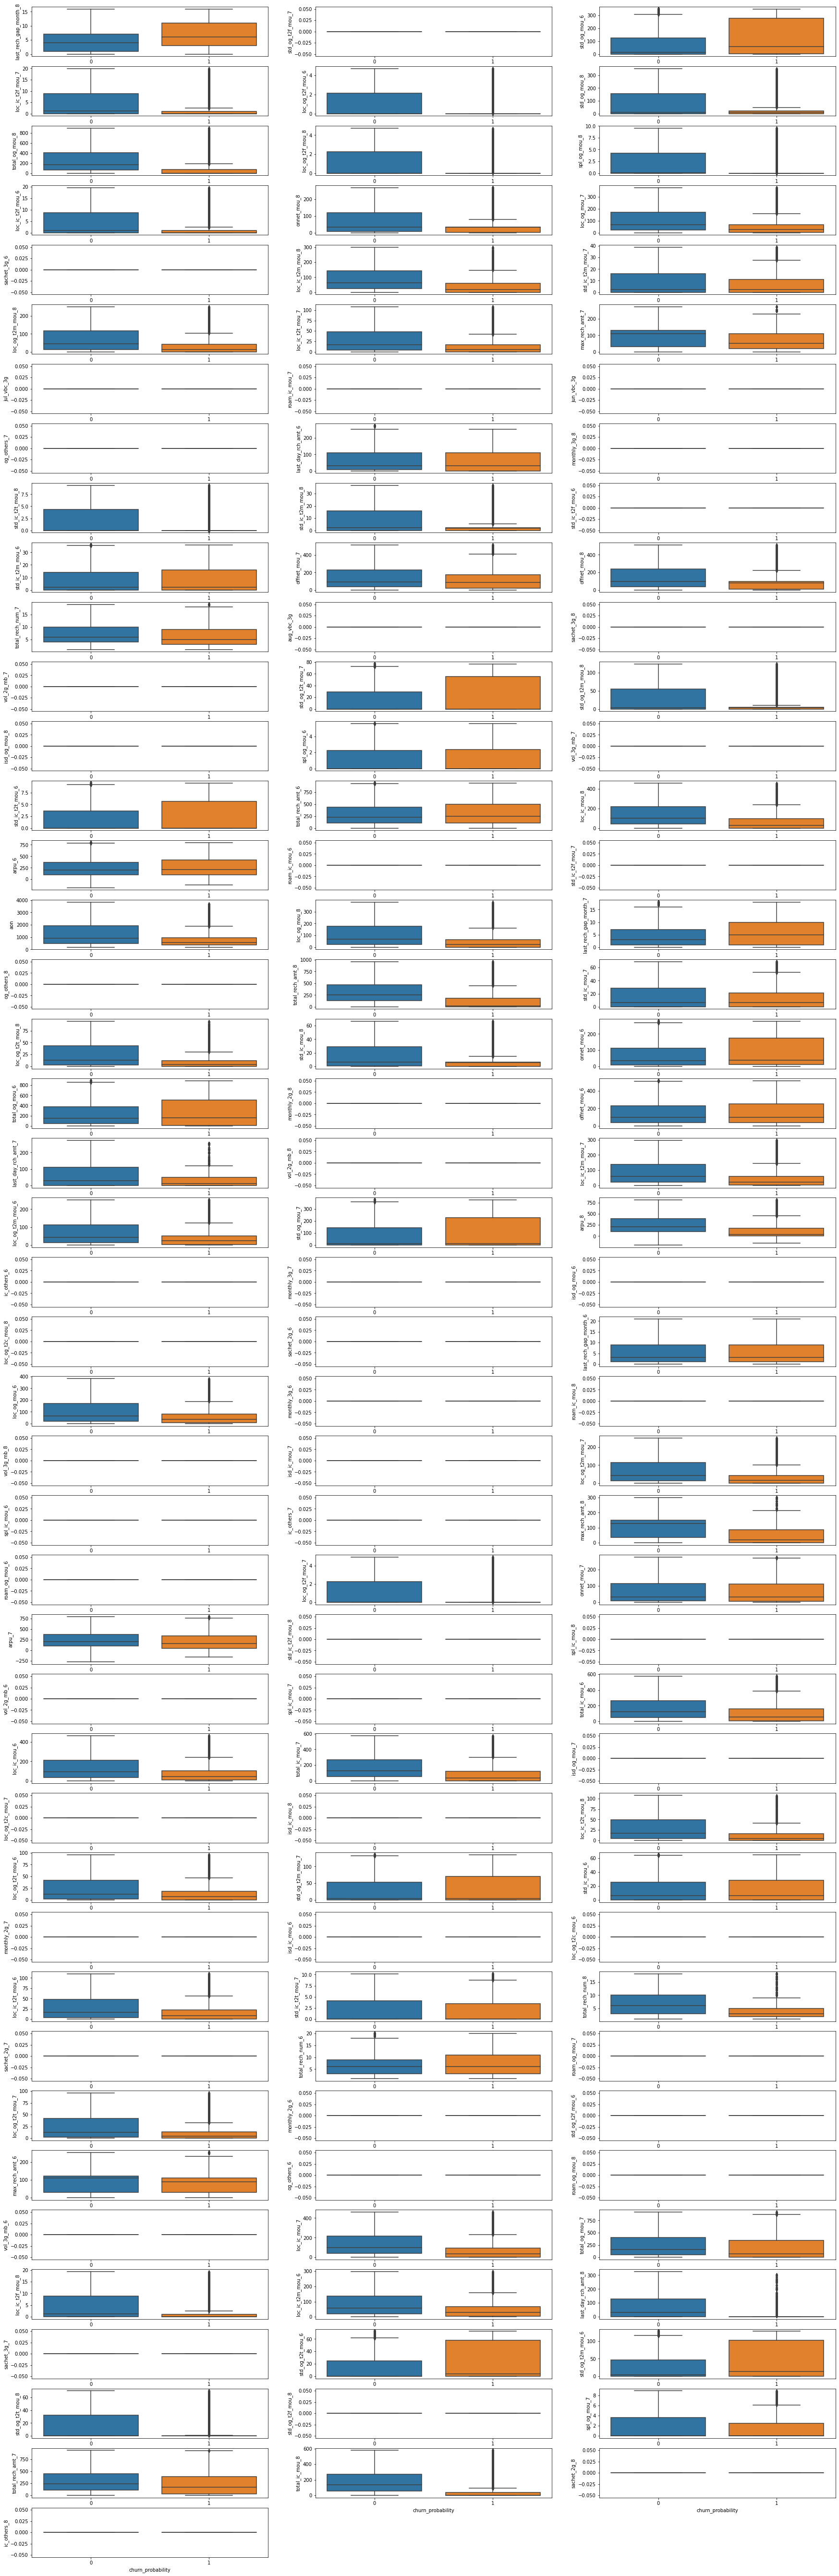

In [93]:
# box plot after removing outlier
display_bulk_box_plot(churn_df,num_cols,target_col)

observation :
1. after comparing of boxplot before and after treatment of outlier, we can see that boxplot of many feature against curn_probabibility have meaningful meaning. It is visible clearly.

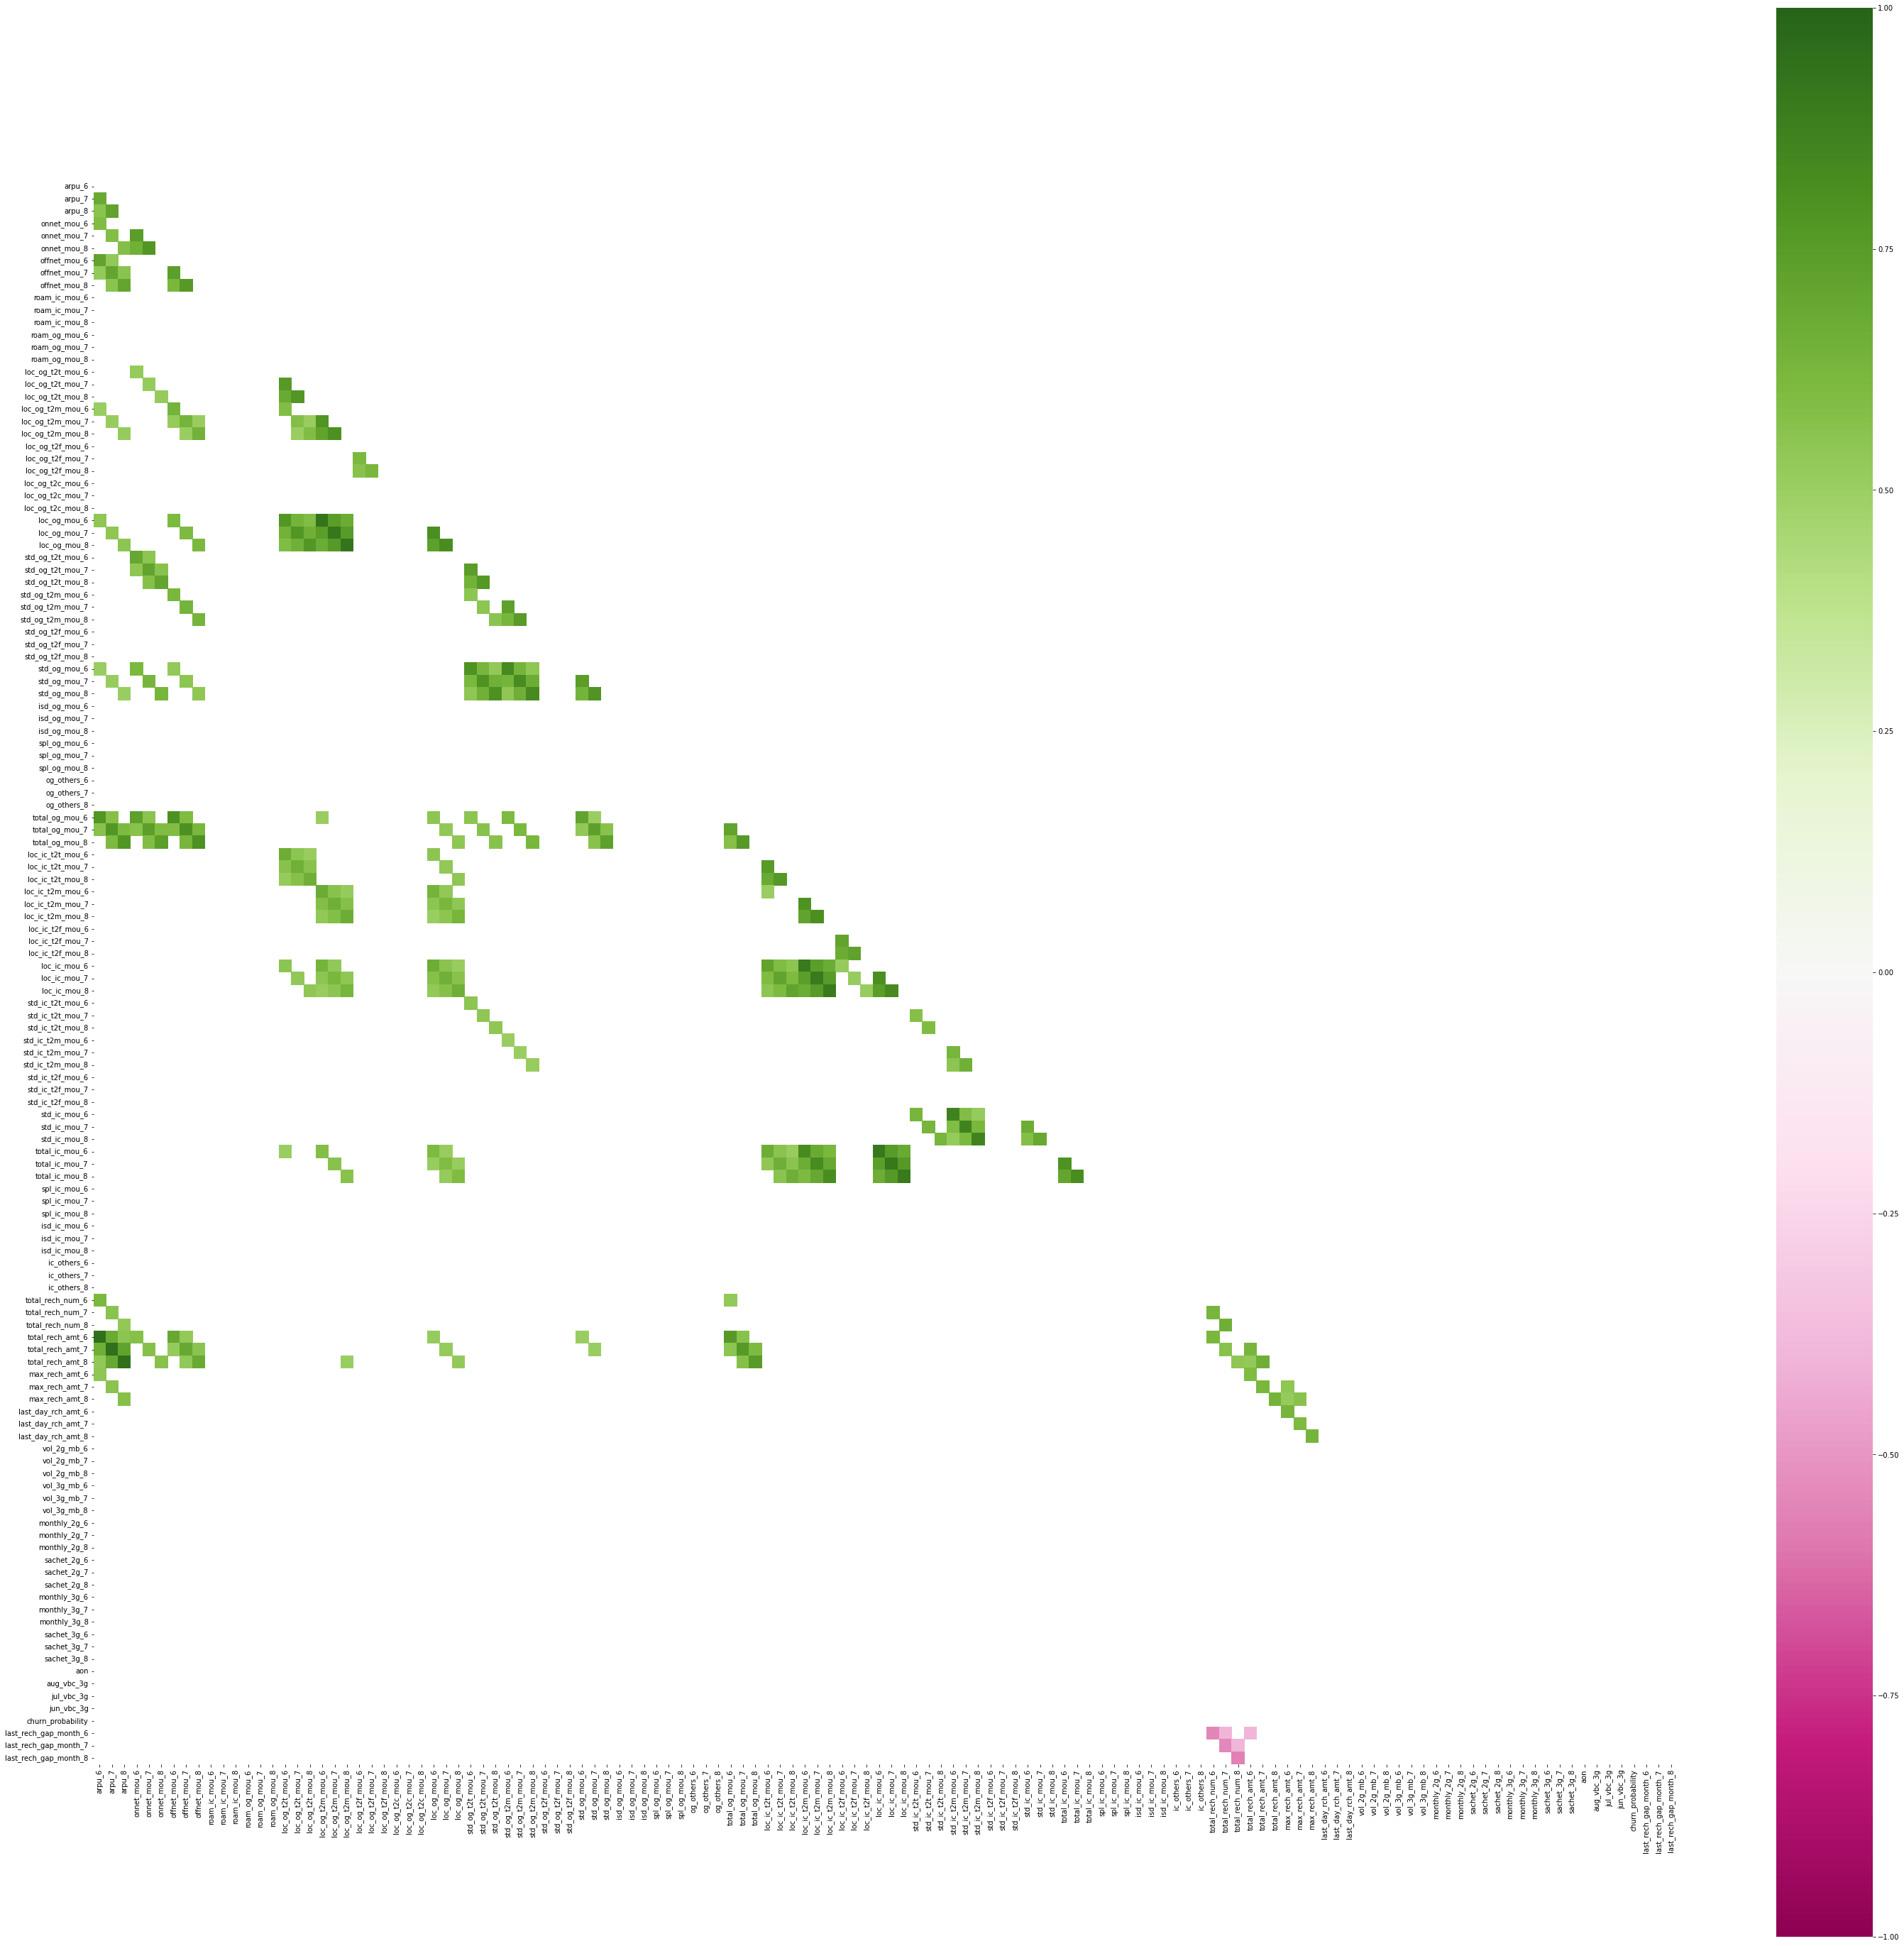

In [94]:
# plotting correlations on a heatmap after outlier removal 

display_corr_heatmap(churn_df)

In [95]:
dist_df=churn_df.describe().transpose()
dist_df

,count,mean,std,min,25%,50%,75%,max
arpu_6,65945.0,257.157602,203.906808,-183.33125,95.329,201.673,376.804,798.909
arpu_7,65945.0,256.623920,203.646135,-275.79900,94.529,200.707,375.538,797.034
arpu_8,65945.0,258.118061,207.734017,-197.95700,93.127,202.185,381.206,813.148
onnet_mou_6,65945.0,71.936974,81.161684,0.00000,7.980,34.410,116.160,278.380
onnet_mou_7,65945.0,71.417369,81.278564,0.00000,7.440,33.530,115.390,277.310
onnet_mou_8,65945.0,69.507755,78.784154,0.00000,7.460,33.030,112.010,268.830
offnet_mou_6,65945.0,148.780186,141.554724,0.00000,36.460,96.680,228.490,516.410
offnet_mou_7,65945.0,147.764561,142.310984,0.00000,34.610,94.390,227.190,515.960
offnet_mou_8,65945.0,146.698005,141.181960,0.00000,34.690,94.250,225.590,511.940
roam_ic_mou_6,65945.0,0.000000,0.000000,0.00000,0.000,0.000,0.000,0.000


In [96]:
#features which became zero after outlier treament
zero_cols=dist_df[dist_df['max']==dist_df['min']].index
zero_cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object')

In [97]:
# it is not good to pass those feature to model so dropping these features
churn_df.drop(columns=zero_cols,axis=1,inplace=True)

In [98]:
# final shape of dataset of which outlier treatment done
churn_df.shape

(65945, 77)

### High Value Customer using Customer Segmentation (Kmean Clustering)

Points : 

1. We have given different usage, recharge amount and total number of recharge for span of 6,7 and 8 month. When customer start to spend less than it is most probable chance to churn out. It means customer will not generate good revenue in last month. So particular customer generate good revenue or not it is decided how much he/she is spending money in initial months. Here  6 and 7 are initial months and 8 is the last month
2. We will take total recharge number, total recharge amount and max recharge amount of 6th and 7th month for clustering 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# since clustering is sensitive to outlier so we choosed outlier treated dataset
# taking total recharge number, total recharge amount and max recharge amount of month 6 and 7.
clust_attr=churn_df[['total_rech_num_6','total_rech_num_7','total_rech_amt_6','total_rech_amt_7','max_rech_amt_6','max_rech_amt_7']]

In [ ]:
# scaling for K-mean clustering
clust_scaler= StandardScaler()
clust_attr[clust_attr.columns]= clust_scaler.fit_transform(clust_attr[clust_attr.columns])

In [ ]:
# finding hopkin value to find out cluster is posible or not
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
# hopkins value is good , It means dataset contains cluster.
hopkins(clust_attr)

0.8651552269935365

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=1)
    kmeans.fit(clust_attr)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(clust_attr, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.33792778026952774
For n_clusters=3, the silhouette score is 0.3124116713891035
For n_clusters=4, the silhouette score is 0.2686163947518635
For n_clusters=5, the silhouette score is 0.26180401708942175


In [ ]:
# taking n_cluster =3
kmean = KMeans(n_clusters=3, max_iter=50,random_state=1)
kmean.fit(clust_attr)

KMeans(max_iter=50, n_clusters=3, random_state=1)

In [ ]:
clust_attr['cluster_label']=kmean.labels_

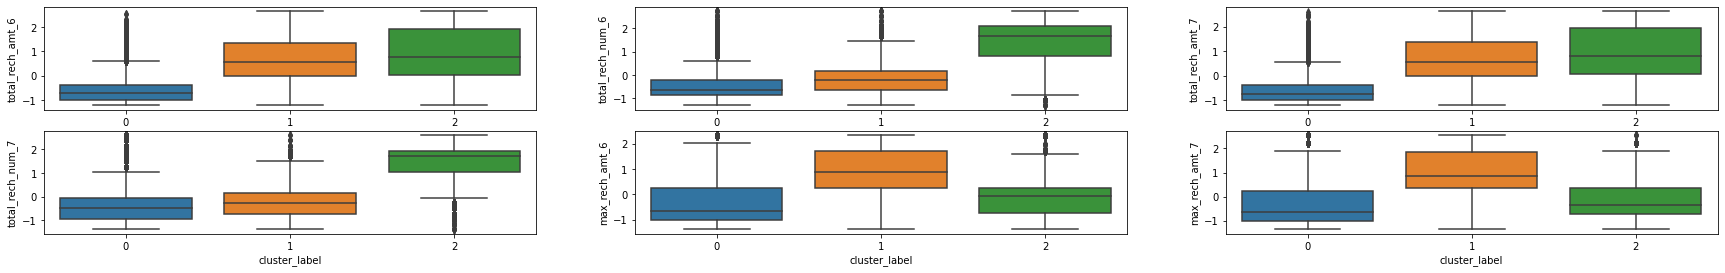

In [ ]:
display_bulk_box_plot(clust_attr,(set(clust_attr.columns)-set(['cluster_label'])),'cluster_label')

observation :

1. Cluster 0 is clearly saperate from other clusters. It is formed with (low value of max recharge amount, low value of total recharge amount, low value of total recharge number.

2. Cluster 1 and 2 are somewhat overlapping each other. These two cluster relatively contains higher side.
3. Cluster 0 is very low revenue generater customers.

In [ ]:
# assign cluster label to churn dataset
churn_df['cluster_label'] = kmean.labels_

#take cluster 1 and 2 which is high value customers
churn_df=churn_df[(churn_df['cluster_label']==1) | (churn_df['cluster_label']==2)]

In [ ]:
churn_df.shape

(30543, 78)

In [ ]:
# then droping cluster_label column
churn_df.drop(columns=['cluster_label'],axis=1,inplace=True)

In [ ]:
# churn rate in high value customer
churn_df[churn_df.churn_probability==1].shape[0]*100/churn_df.shape[0]

7.271715286645057

In [ ]:
# saving data in disk 
churn_df.to_csv("cleaned_high_profile_churn.csv",index=False)

In [99]:
# saving data in disk 
churn_df = pd.read_csv("cleaned_high_profile_churn.csv")

In [100]:
churn_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,churn_probability,last_rech_gap_month_6,last_rech_gap_month_7,last_rech_gap_month_8
0,240.708,128.191,101.565,21.28,4.83,6.13,56.9900,38.1100,9.630,10.16,4.83,6.1300,36.7400,19.8800,4.61,3.7611,1.2300,3.781,58.91,25.94,15.7600,0.0000,0.0000,0.00,4.3500,0.0000,0.0000,4.3500,0.0000,0.0000,0.0000,7.0844,0.00,63.26,42.94,15.76,5.4400,1.3900,2.6600,10.58,4.3300,19.49,5.51,3.63,6.1400,21.54,9.3600,28.3100,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,21.54,9.3600,28.3100,13.0,10.0,8.00,290.0,136.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,647.0,0,5.0,5.0,1.0
1,167.861,167.869,167.866,0.00,0.00,0.00,0.0000,0.0000,0.000,0.00,0.00,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.000,0.00,0.00,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.00,0.00,11.3600,6.0400,28.4400,13.41,9.1600,8.73,0.00,0.00,4.1400,24.78,15.2100,41.3300,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.3300,0.6800,2.4900,25.11,15.8900,43.8300,2.0,3.0,2.00,198.0,198.0,198.0,198.0,198.0,198.0,198.0,198.0,0.0,584.0,0,10.0,9.0,3.0
2,439.919,397.946,392.024,244.46,108.31,42.98,418.5997,417.8442,414.581,0.00,7.86,3.9800,44.0100,13.9300,51.24,0.0000,0.0000,0.000,44.01,21.79,55.2300,57.6304,61.1527,38.99,101.9079,107.5197,98.5647,278.2219,299.2164,281.4059,0.0000,0.0000,0.00,816.44,836.23,687.41,0.0000,0.5300,1.0600,26.93,25.6800,23.46,0.00,0.00,0.0000,26.93,26.2100,24.5300,0.2300,0.0000,0.0000,7.33,8.6400,2.4600,7.5600,9.1300,2.4600,34.49,35.3400,26.9900,15.0,10.0,14.94,521.0,418.0,365.0,110.0,110.0,50.0,110.0,0.0,0.0,322.0,0,1.0,1.0,1.0
3,340.266,205.397,191.780,123.76,116.34,75.93,98.5100,94.1100,150.610,88.43,78.51,72.0800,49.4800,41.7600,43.19,1.7600,0.0000,3.060,139.68,120.28,118.3400,35.3300,37.8300,3.85,38.6300,52.3400,104.3400,73.9600,90.1800,108.1900,4.4775,0.0000,0.86,228.68,210.46,227.41,88.0743,86.8618,76.5800,87.36,92.9400,143.88,1.00,0.41,15.3827,289.09,242.9100,250.4100,7.5819,8.0794,7.4625,19.06,30.9644,29.2729,51.6211,55.0239,53.0542,414.71,336.7800,369.5300,7.0,3.0,2.00,530.0,170.0,300.0,150.0,120.0,150.0,110.0,120.0,150.0,1049.0,0,2.0,11.0,6.0
4,580.549,377.294,338.286,10.43,24.99,194.43,317.1100,341.7900,197.090,10.43,24.99,75.8986,203.3324,201.4939,185.88,3.2600,3.9601,3.781,327.46,366.79,306.4388,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,6.2600,0.0800,0.0000,0.00,327.64,366.79,391.53,13.8600,20.1800,86.5539,219.31,240.0151,285.63,0.00,1.93,8.8800,233.18,373.4503,373.3236,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,1.0300,0.0000,233.18,465.6025,469.6316,5.0,3.0,4.00,654.0,400.0,652.0,250.0,250.0,250.0,0.0,150.0,250.0,602.0,0,3.0,6.0,1.0


### Preparing dataset for model :

In [101]:
# before splitting let's see numeric cols
features = churn_df.drop(columns=[target_col],axis=1).columns

#### Train & Test set split :

In [102]:
# Preparing Test and Train set
df_train, df_test = train_test_split(churn_df,stratify=churn_df[target_col],train_size = 0.7, 
                                     test_size = 0.3, random_state = 1)

#### Scaling Numerical Features

In [103]:
std_scaler = StandardScaler()

In [104]:
## first fit on train dataset and then transform
df_train[features]=std_scaler.fit_transform(df_train[features])
## sacaling the test data set using same std_scale
df_test[features]=std_scaler.transform(df_test[features])

#### Feature & Target Saperation :

In [105]:
#function to seperate features & target columns.
def get_feature_and_target(df) :
  features=df.drop(columns=['churn_probability'],axis=1)
  target = df['churn_probability']
  return features,target

In [106]:
# xtrain and ytrain
Xtrain,ytrain=get_feature_and_target(df_train)
# xtest and ytest
Xtest,ytest=get_feature_and_target(df_test)

print("shape of X train ==> ",Xtrain.shape)
print("shape of y train ==> ",ytrain.shape)
print("shape of X test ==> ",Xtest.shape)
print("shape of y test ==> ",ytest.shape)

shape of X train ==>  (21380, 76)
shape of y train ==>  (21380,)
shape of X test ==>  (9163, 76)
shape of y test ==>  (9163,)


### Classfication Model Building :

In [107]:
def get_scores(confusion) :
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    tpr=sensitivity=recall=TP/(TP+FN)
    fpr=FP/(TN+FP)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    return accuracy,precision,recall,specificity,sensitivity

def print_score(estimator,X_train,y_train,X_test,y_test) :
  accuracy_tr,precision_tr,recall_tr,specificity_tr,sensitivity_tr = get_scores(confusion_matrix(y_train,
                                                                                                 estimator.predict(X_train)))

  accuracy_tst,precision_tst,recall_tst,specificity_tst,sensitivity_tst = get_scores(confusion_matrix(y_test,
                                                                                                 estimator.predict(X_test)))
  
  print("train accuracy : ",accuracy_tr)
  print("train precision : ",precision_tr)
  print("train recall : ",recall_tr)
  print("train specificity : ",specificity_tr)
  print("train sensitivity : ",sensitivity_tr)

  print("test accuracy : ",accuracy_tst)
  print("test precision : ",precision_tst)
  print("test recall : ",recall_tst)
  print("test specificity : ",specificity_tst)
  print("test sensitivity : ",sensitivity_tst)

#### Adaboost & Hyper Parameter Tunining

In [ ]:
ada = AdaBoostClassifier()
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
params = {'n_estimators': [50,100,150,200,300,400],
          "learning_rate":[0.001,0.01,0.1,1.0]
          }

# Create a shallow tree as weak learner
# using class_weight to handle inbalance class dataset
tree_stump = DecisionTreeClassifier(max_depth=1,class_weight='balanced',random_state = 1)

ada_boost = AdaBoostClassifier(base_estimator=tree_stump,random_state=1)

# cross validation
folds=5
ada_boost_cv = GridSearchCV(estimator = ada_boost,
                        param_grid = params, 
                        scoring= 'accuracy',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

ada_boost_cv.fit(Xtrain, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_depth=1,
                                                                                random_state=1),
                                          random_state=1),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150, 200, 300, 400]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
ada_boost_cv_df = pd.DataFrame(ada_boost_cv.cv_results_)
ada_boost_cv_df.sort_values(by=['rank_test_score']).head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
23,49.311489,1.519192,0.442411,0.078865,1.0,400,"{'learning_rate': 1.0, 'n_estimators': 400}",0.884238,0.878391,0.878391,0.878157,0.881899,0.880215,0.002446,1,0.900374,0.898152,0.900783,0.898620,0.900667,0.899719,0.001106
22,36.337434,0.486957,0.363232,0.076025,1.0,300,"{'learning_rate': 1.0, 'n_estimators': 300}",0.881197,0.874883,0.873246,0.878391,0.881431,0.877830,0.003296,2,0.896574,0.892481,0.894060,0.894177,0.896983,0.894855,0.001686
21,24.414224,0.413172,0.224086,0.040952,1.0,200,"{'learning_rate': 1.0, 'n_estimators': 200}",0.879093,0.869270,0.869504,0.867867,0.877689,0.872685,0.004714,3,0.886927,0.885115,0.883887,0.885465,0.887746,0.885828,0.001363
17,49.462867,1.506666,0.456848,0.082520,0.1,400,"{'learning_rate': 0.1, 'n_estimators': 400}",0.877689,0.868101,0.869738,0.863424,0.871843,0.870159,0.004676,4,0.874708,0.871609,0.873597,0.875175,0.876169,0.874252,0.001559
20,18.808236,0.740159,0.215016,0.054284,1.0,150,"{'learning_rate': 1.0, 'n_estimators': 150}",0.874649,0.870674,0.865996,0.863424,0.874415,0.869832,0.004488,5,0.883244,0.879560,0.878216,0.880613,0.884062,0.881139,0.002204
16,36.387315,0.423282,0.372104,0.078530,0.1,300,"{'learning_rate': 0.1, 'n_estimators': 300}",0.875819,0.867166,0.866698,0.862254,0.872077,0.868803,0.004689,6,0.871141,0.868627,0.872486,0.872135,0.875117,0.871901,0.002099


In [ ]:
# best param but no difference much of accuracy if we choose 300 estimator
ada_boost_cv.best_params_

{'learning_rate': 1.0, 'n_estimators': 400}

In [ ]:
# print adaboost_score
print_score(ada_boost_cv.best_estimator_,Xtrain,ytrain,Xtest,ytest)

train accuracy :  0.8904583723105707
train precision :  0.3875392969419834
train recall :  0.8720257234726688
train specificity :  0.8919041614123582
train sensitivity :  0.8720257234726688
test accuracy :  0.881479864673142
test precision :  0.35232067510548526
test recall :  0.7522522522522522
test specificity :  0.891608803106979
test sensitivity :  0.7522522522522522


In [ ]:
# important feature 
features_cols_name = list(Xtrain.columns)
feature_importance_score=list(ada_boost_cv.best_estimator_.feature_importances_)
model_parameters=sorted(list(zip(features_cols_name,feature_importance_score)), key=lambda x:abs(x[1]), reverse=True)
model_parameters[0:30]

[('loc_ic_t2t_mou_7', 0.04),
 ('loc_ic_mou_8', 0.0375),
 ('total_ic_mou_8', 0.0375),
 ('loc_ic_t2m_mou_7', 0.03),
 ('loc_og_t2t_mou_8', 0.0275),
 ('offnet_mou_8', 0.025),
 ('total_ic_mou_7', 0.025),
 ('total_rech_amt_8', 0.025),
 ('arpu_7', 0.0225),
 ('std_og_mou_6', 0.0225),
 ('loc_ic_t2t_mou_6', 0.0225),
 ('total_ic_mou_6', 0.0225),
 ('last_rech_gap_month_8', 0.0225),
 ('onnet_mou_7', 0.02),
 ('offnet_mou_6', 0.02),
 ('loc_og_t2m_mou_8', 0.02),
 ('loc_og_mou_6', 0.02),
 ('loc_og_mou_8', 0.02),
 ('total_og_mou_8', 0.02),
 ('loc_ic_t2m_mou_8', 0.02),
 ('std_ic_mou_6', 0.0175),
 ('std_ic_mou_7', 0.0175),
 ('max_rech_amt_8', 0.0175),
 ('last_day_rch_amt_8', 0.0175),
 ('aon', 0.0175),
 ('arpu_8', 0.015),
 ('loc_og_t2t_mou_7', 0.015),
 ('loc_og_t2m_mou_6', 0.015),
 ('spl_og_mou_7', 0.015),
 ('loc_ic_t2f_mou_6', 0.015)]

observation :
1. as we can see top 5 important features deciding churing are related to incoming local call.

#### Gradient Boosting & Hyperparameter Tunining

In [ ]:
gb=GradientBoostingClassifier(random_state=1)
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params = {'n_estimators': [800],
          "learning_rate":[0.001,0.01,0.1,1.0],
          "subsample":[0.7,0.8],
          "max_features":['sqrt','log2'],
          "max_depth":[8,11,13],
          }


# using class_weight to handle inbalance class dataset

gb = GradientBoostingClassifier()

# cross validation
folds=5
gb_boost_cv = GridSearchCV(estimator = gb,
                        param_grid = params, 
                        scoring= 'accuracy',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

gb_boost_cv.fit(Xtrain, ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': [8, 11, 13],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [800], 'subsample': [0.7, 0.8]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# see gb cv result
gb_boost_df = pd.DataFrame(gb_boost_cv.cv_results_)
gb_boost_df.sort_values(by=['rank_test_score']).head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
12,57.221461,0.812451,0.183669,0.018152,0.01,8,sqrt,800,0.7,"{'learning_rate': 0.01, 'max_depth': 8, 'max_f...",0.942470,0.943873,0.940365,0.945510,0.941768,0.942797,0.001766,1,0.993159,0.992049,0.992809,0.992809,0.992750,0.992715,0.000363
13,63.818346,0.872284,0.180998,0.016078,0.01,8,sqrt,800,0.8,"{'learning_rate': 0.01, 'max_depth': 8, 'max_f...",0.942937,0.943405,0.939897,0.944808,0.942236,0.942657,0.001616,2,0.993803,0.992926,0.993452,0.993393,0.993686,0.993452,0.000303
17,96.239319,0.603627,0.261115,0.001858,0.01,11,sqrt,800,0.8,"{'learning_rate': 0.01, 'max_depth': 11, 'max_...",0.943171,0.942236,0.940365,0.945744,0.941534,0.942610,0.001815,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
21,126.409690,1.474167,0.355585,0.007130,0.01,13,sqrt,800,0.8,"{'learning_rate': 0.01, 'max_depth': 13, 'max_...",0.942937,0.943639,0.939897,0.945276,0.940599,0.942470,0.001979,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
22,96.269053,1.111036,0.373932,0.019042,0.01,13,log2,800,0.7,"{'learning_rate': 0.01, 'max_depth': 13, 'max_...",0.943171,0.943639,0.938728,0.944808,0.941300,0.942329,0.002126,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
20,113.685738,2.678731,0.347911,0.005904,0.01,13,sqrt,800,0.7,"{'learning_rate': 0.01, 'max_depth': 13, 'max_...",0.943873,0.943405,0.940365,0.945276,0.938728,0.942329,0.002410,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
# see gb cv best param
gb_boost_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 800,
 'subsample': 0.7}

In [ ]:
# print adaboost_score
print_score(gb_boost_cv.best_estimator_,Xtrain,ytrain,Xtest,ytest)

train accuracy :  0.9897567820392891
train precision :  0.9977645305514158
train recall :  0.8610932475884244
train specificity :  0.9998486759142496
train sensitivity :  0.8610932475884244
test accuracy :  0.9466331987340391
test precision :  0.7322834645669292
test recall :  0.4189189189189189
test specificity :  0.9879957632105449
test sensitivity :  0.4189189189189189


observation : 

we cleary can compare previous Adaboost that Gradient boosting perfomed better also it provided more meaningful features

In [ ]:
# gb important feature 
features_cols_name = list(Xtrain.columns)
feature_importance_score=list(gb_boost_cv.best_estimator_.feature_importances_)
model_parameters=sorted(list(zip(features_cols_name,feature_importance_score)), key=lambda x:abs(x[1]), reverse=True)
model_parameters[0:30]

[('total_ic_mou_8', 0.07868262962918644),
 ('arpu_8', 0.05775369662381579),
 ('total_og_mou_8', 0.047897231155637356),
 ('total_rech_amt_8', 0.03936473389011327),
 ('loc_ic_mou_8', 0.033290806316358286),
 ('max_rech_amt_8', 0.03227678830413837),
 ('last_day_rch_amt_8', 0.029505430106101852),
 ('loc_ic_t2m_mou_8', 0.027937474560427063),
 ('last_rech_gap_month_8', 0.02518493757830122),
 ('offnet_mou_8', 0.018858518209572152),
 ('loc_og_mou_8', 0.015614184514043785),
 ('aon', 0.015498899551114786),
 ('total_rech_num_7', 0.014873796038735237),
 ('loc_ic_t2t_mou_8', 0.014791971299661503),
 ('arpu_7', 0.0146811227107061),
 ('arpu_6', 0.013709617352740363),
 ('loc_og_t2m_mou_8', 0.01355293004403772),
 ('loc_ic_t2m_mou_7', 0.013226989541189718),
 ('total_ic_mou_7', 0.013210107198529865),
 ('std_ic_mou_8', 0.012945094610979693),
 ('total_rech_amt_7', 0.012776107954565422),
 ('total_ic_mou_6', 0.012735038138753114),
 ('onnet_mou_8', 0.012688523046681697),
 ('loc_ic_mou_7', 0.012200156906105637),

#### RandomForest & Hyper paramter tuning

In [ ]:
rclf = RandomForestClassifier()
rclf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params = {'n_estimators': [100,200,300],
          "max_depth":[8,11,13],
          "class_weight":["balanced"],
          "n_jobs":[2]
          }


# using class_weight to handle inbalance class dataset
rclf = RandomForestClassifier()

# cross validation
folds=5
rclf_cv = GridSearchCV(estimator = rclf,
                        param_grid = params, 
                        scoring= 'accuracy',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

rclf_cv.fit(Xtrain, ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [8, 11, 13],
                         'n_estimators': [100, 200, 300], 'n_jobs': [2]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# see gb cv result
rf_clf_cv_df = pd.DataFrame(rclf_cv.cv_results_)
rf_clf_cv_df.sort_values(by=['rank_test_score']).head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_n_estimators,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,18.861971,0.909835,0.238302,0.055502,balanced,13,300,2,"{'class_weight': 'balanced', 'max_depth': 13, ...",0.942937,0.939196,0.939196,0.942236,0.938728,0.940458,0.001760,1,0.980882,0.980122,0.981466,0.981232,0.981291,0.980999,0.000478
7,12.699342,0.431677,0.139896,0.002634,balanced,13,200,2,"{'class_weight': 'balanced', 'max_depth': 13, ...",0.944107,0.938962,0.938728,0.941300,0.938728,0.940365,0.002107,2,0.980823,0.980063,0.981232,0.980239,0.981232,0.980718,0.000490
6,6.369717,0.933669,0.093823,0.023724,balanced,13,100,2,"{'class_weight': 'balanced', 'max_depth': 13, ...",0.940833,0.938260,0.938494,0.943405,0.939663,0.940131,0.001877,3,0.980940,0.979829,0.981057,0.980823,0.981174,0.980765,0.000482
5,18.172066,1.792606,0.199863,0.007655,balanced,11,300,2,"{'class_weight': 'balanced', 'max_depth': 11, ...",0.940599,0.937792,0.936623,0.938260,0.935921,0.937839,0.001609,4,0.971995,0.971527,0.971995,0.972170,0.971936,0.971925,0.000214
3,6.272268,0.998496,0.075772,0.008835,balanced,11,100,2,"{'class_weight': 'balanced', 'max_depth': 11, ...",0.938962,0.935688,0.934986,0.939897,0.936389,0.937184,0.001909,5,0.970475,0.971293,0.971527,0.971293,0.972404,0.971399,0.000617
4,11.783403,0.752200,0.160629,0.035210,balanced,11,200,2,"{'class_weight': 'balanced', 'max_depth': 11, ...",0.939429,0.936155,0.934284,0.937325,0.935921,0.936623,0.001706,6,0.971001,0.972112,0.972053,0.971586,0.972580,0.971866,0.000535


In [ ]:
rclf_cv.best_params_

{'class_weight': 'balanced', 'max_depth': 13, 'n_estimators': 300, 'n_jobs': 2}

In [ ]:
# rancom forest with best paramter
rf_clf = RandomForestClassifier(random_state=1,
                                n_estimators=300,
                                n_jobs=2,
                                class_weight='balanced',
                                max_depth=13)
rf_clf.fit(Xtrain,ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=300,
                       n_jobs=2, random_state=1)

In [ ]:
# printing rf train & test score 
print_score(rf_clf,Xtrain,ytrain,Xtest,ytest)

train accuracy :  0.9786248830682881
train precision :  0.773406374501992
train recall :  0.9987138263665595
train specificity :  0.9770491803278688
train sensitivity :  0.9987138263665595
test accuracy :  0.9433591618465568
test precision :  0.6273830155979203
test recall :  0.5435435435435435
test specificity :  0.9746969518653642
test sensitivity :  0.5435435435435435


In [ ]:
# printing rf train & test score 
print_score(rf_clf,Xtrain,ytrain,Xtest,ytest)

#### XGB & Hyper Parameter Tuning

In [ ]:
import xgboost as xgb
xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic').get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
params = {
        'n_estimators' : [100, 200, 500], # no of trees 
        'learning_rate' : [0.001,0.05,0.1],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [5, 10, 12]
        }
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic',scale_pos_weight=93)

folds = 5

param_comb = 800

random_search_xgb_cv = RandomizedSearchCV(xgb_cfl, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='accuracy', 
                                   n_jobs=-1, cv=5, 
                                   verbose=3, 
                                   random_state=1)
random_search_xgb_cv.fit(Xtrain,ytrain)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


In [ ]:
print('\n Best estimator:')
print(random_search_xgb_cv.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search_xgb_cv.best_score_ )
print('\n Best hyperparameters:')
print(random_search_xgb_cv.best_params_)

#### Logistic Regression & Tuning 

In [150]:
# Generic function to calculate VIF of variables
def vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [149]:
## Building model using statsmodel, for the detailed statistics
def train_sm_model(features,target) :
  features_sm=sm.add_constant(features)
  smlr = sm.GLM(target,features_sm,family=sm.families.Binomial()).fit()
  return smlr

def predict_from_stat_model(features,ols_model) :
  features_sm=sm.add_constant(features)
  return ols_model.predict(features_sm)

In [148]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def logistic_statsmodel(cols,threshold=0.5):
    cols=list(cols)

    xtrain_features = Xtrain[cols]
    xtest_features = Xtest[cols]

    smlogis=train_sm_model(xtrain_features,ytrain)
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for', cols)
    print('='*78)
    print(smlogis.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
   
    print('='*78)
    print('Summary detail')
    print(smlogis.summary())
    print('='*78,'\n')
    
    # Vif calculation
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif1=vif(xtrain_features)
    print(vif1)
    print('='*78)
    # train r2_score & test_r2_score
    print('='*78)
    ytestpred = predict_from_stat_model(xtest_features,smlogis).values.reshape(-1)
    ytrainpred = predict_from_stat_model(xtrain_features,smlogis).values.reshape(-1)

    ytestpred = np.where(ytestpred > threshold,1,0)
    ytrainpred = np.where(ytrainpred > threshold,1,0)

    
    accuracy_tr,precision_tr,recall_tr,specificity_tr,sensitivity_tr = get_scores(confusion_matrix(ytrain,ytrainpred))
                                                                                      
    accuracy_tst,precision_tst,recall_tst,specificity_tst,sensitivity_tst = get_scores(confusion_matrix(ytest,ytestpred))
                                                                    
  
    print(f"train accuracy : {accuracy_tr} ,precision :{precision_tr}, recall :{recall_tr}")
    print(f"train specificity : {specificity_tr},sensitivity :{sensitivity_tr}")

    print(f"Test accuracy : {accuracy_tst} ,precision :{precision_tst}, recall :{recall_tst}")
    print(f"specificity : {specificity_tst},sensitivity :{sensitivity_tr}")
    return smlogis

##### Features Selection using RFE method

In [143]:
cols_for_logis = Xtrain.columns


In [144]:
# first choosing best features 
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

rfe = RFE(logreg,n_features_to_select=30)             # running RFE with 30 variables as output
rfe = rfe.fit(Xtrain, ytrain)

In [145]:
# printing feature rank wise
rfe_features=list(zip(cols_for_logis, rfe.support_, rfe.ranking_))
sorted(rfe_features, key = lambda t: t[1],reverse=True)

[('arpu_6', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_8', True, 1),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_mou_8', True, 1),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_7', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2m_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_6', True, 1),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_6', True, 1),
 ('total_rech_amt_7', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_7', True, 1),
 ('max_rech_amt_8', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('aon', True, 1),
 ('last_rech_gap_month_8', True, 1),
 ('arpu_7', False, 17),
 ('onnet_mou_7', False, 19),
 ('offnet_mou_7', False, 21),
 ('loc_og_t2t_mou_6', False, 2),


In [146]:
# top 30 feature according to rfe
cols_for_logis = cols_for_logis[rfe.support_]
cols_for_logis

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_8', 'loc_og_t2t_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_8',
       'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8'],
      dtype='object')

##### build best logistic regression model with multiple tries 

In [151]:
logistic_statsmodel(cols_for_logis)


Parameters obtained for ['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_t2t_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8']
const                   -3.824826
arpu_6                  -0.220691
arpu_8                  -0.174807
onnet_mou_6              0.224351
onnet_mou_8              0.298265
offnet_mou_6             0.163093
offnet_mou_8             0.384380
loc_og_t2t_mou_7         0.071580
loc_og_mou_7            -0.360825
std_og_t2t_mou_8        -0.218606
std_og_mou_8             0.173161
total_og_mou_8          -0.805869
loc_ic_t2t_mou_8        -0.446282
loc_ic_t2

In [152]:
# Model-2 
# remvoing loc_ic_mou_8 from feature and re-run 
cols_for_logis=cols_for_logis.drop("loc_ic_mou_8")
logistic_statsmodel(cols_for_logis)

Parameters obtained for ['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_t2t_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8']
const                   -3.809933
arpu_6                  -0.203410
arpu_8                  -0.239662
onnet_mou_6              0.229922
onnet_mou_8              0.370416
offnet_mou_6             0.148404
offnet_mou_8             0.448051
loc_og_t2t_mou_7         0.035299
loc_og_mou_7            -0.384393
std_og_t2t_mou_8        -0.269362
std_og_mou_8             0.168224
total_og_mou_8          -0.863549
loc_ic_t2t_mou_8        -0.004688
loc_ic_t2m_mou_8         

In [153]:
# Model-3
# remvoing total_rech_amt_8 from feature and re-run 
cols_for_logis=cols_for_logis.drop("total_rech_amt_8")
logistic_statsmodel(cols_for_logis)

Parameters obtained for ['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_t2t_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8']
const                   -3.814385
arpu_6                  -0.189786
arpu_8                  -0.000994
onnet_mou_6              0.231200
onnet_mou_8              0.376916
offnet_mou_6             0.144351
offnet_mou_8             0.454760
loc_og_t2t_mou_7         0.034259
loc_og_mou_7            -0.394784
std_og_t2t_mou_8        -0.279056
std_og_mou_8             0.142352
total_og_mou_8          -0.823431
loc_ic_t2t_mou_8         0.000312
loc_ic_t2m_mou_8         0.099736
loc_ic_t2f_

In [154]:
# Model-3
# remvoing total_ic_mou_7 from feature and re-run 
cols_for_logis=cols_for_logis.drop("total_ic_mou_7")
logistic_statsmodel(cols_for_logis)

Parameters obtained for ['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_t2t_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8']
const                   -3.808894
arpu_6                  -0.210204
arpu_8                  -0.015800
onnet_mou_6              0.229365
onnet_mou_8              0.386807
offnet_mou_6             0.139467
offnet_mou_8             0.470613
loc_og_t2t_mou_7         0.035952
loc_og_mou_7            -0.397555
std_og_t2t_mou_8        -0.278291
std_og_mou_8             0.155511
total_og_mou_8          -0.857050
loc_ic_t2t_mou_8        -0.070071
loc_ic_t2m_mou_8        -0.046270
loc_ic_t2f_mou_8        -0.14

In [155]:
# Model-4
# remvoing loc_ic_t2m_mou_8 from feature and re-run 
cols_for_logis=cols_for_logis.drop("loc_ic_t2m_mou_8")
logistic_statsmodel(cols_for_logis)

Parameters obtained for ['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_t2t_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8']
const                   -3.809105
arpu_6                  -0.213203
arpu_8                  -0.012925
onnet_mou_6              0.230610
onnet_mou_8              0.384722
offnet_mou_6             0.141385
offnet_mou_8             0.463230
loc_og_t2t_mou_7         0.039655
loc_og_mou_7            -0.401041
std_og_t2t_mou_8        -0.278644
std_og_mou_8             0.159681
total_og_mou_8          -0.857291
loc_ic_t2t_mou_8        -0.066134
loc_ic_t2f_mou_8        -0.143188
loc_ic_mou_7             0.187464
std_ic_t2m_mou_

In [156]:
# Model-4
# remvoing loc_ic_t2m_mou_8 from feature and re-run 
cols_for_logis=cols_for_logis.drop("arpu_8")
logistic_statsmodel(cols_for_logis)

Parameters obtained for ['arpu_6', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_t2t_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8']
const                   -3.809580
arpu_6                  -0.213108
onnet_mou_6              0.231583
onnet_mou_8              0.382377
offnet_mou_6             0.142463
offnet_mou_8             0.459798
loc_og_t2t_mou_7         0.039749
loc_og_mou_7            -0.400320
std_og_t2t_mou_8        -0.278687
std_og_mou_8             0.162667
total_og_mou_8          -0.860833
loc_ic_t2t_mou_8        -0.065651
loc_ic_t2f_mou_8        -0.143231
loc_ic_mou_7             0.187615
std_ic_t2m_mou_8        -0.306278
std_ic_mou_8             

In [157]:
# Model-6
# remvoing loc_og_t2t_mou_7 from feature and re-run 
cols_for_logis=cols_for_logis.drop("loc_og_t2t_mou_7")
logistic_statsmodel(cols_for_logis)

Parameters obtained for ['arpu_6', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8']
const                   -3.808751
arpu_6                  -0.214841
onnet_mou_6              0.237018
onnet_mou_8              0.385366
offnet_mou_6             0.141435
offnet_mou_8             0.457412
loc_og_mou_7            -0.371989
std_og_t2t_mou_8        -0.283725
std_og_mou_8             0.165524
total_og_mou_8          -0.861862
loc_ic_t2t_mou_8        -0.053108
loc_ic_t2f_mou_8        -0.143458
loc_ic_mou_7             0.188585
std_ic_t2m_mou_8        -0.304308
std_ic_mou_8             0.289528
total_ic_mou_6           0.231288
total_ic_mo

In [158]:
# Model-6
# remvoing arpu_6 from feature and re-run 
cols_for_logis=cols_for_logis.drop("arpu_6")
logistic_statsmodel(cols_for_logis)

Parameters obtained for ['onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8']
const                   -3.804054
onnet_mou_6              0.225033
onnet_mou_8              0.388244
offnet_mou_6             0.124871
offnet_mou_8             0.464794
loc_og_mou_7            -0.363496
std_og_t2t_mou_8        -0.279099
std_og_mou_8             0.172029
total_og_mou_8          -0.862535
loc_ic_t2t_mou_8        -0.056714
loc_ic_t2f_mou_8        -0.147892
loc_ic_mou_7             0.192663
std_ic_t2m_mou_8        -0.303722
std_ic_mou_8             0.290151
total_ic_mou_6           0.221367
total_ic_mou_8          -1.201306
total_rech_num_8     

In [159]:
# Model-6
# remvoing total_og_mou_8 from feature and re-run 
cols_for_logis=cols_for_logis.drop("total_og_mou_8")
logistic_statsmodel(cols_for_logis)

Parameters obtained for ['onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8']
const                   -3.795281
onnet_mou_6              0.228732
onnet_mou_8              0.218070
offnet_mou_6             0.147100
offnet_mou_8             0.210314
loc_og_mou_7            -0.460931
std_og_t2t_mou_8        -0.257666
std_og_mou_8            -0.253413
loc_ic_t2t_mou_8        -0.072064
loc_ic_t2f_mou_8        -0.165251
loc_ic_mou_7             0.254466
std_ic_t2m_mou_8        -0.274833
std_ic_mou_8             0.331402
total_ic_mou_6           0.249437
total_ic_mou_8          -1.445483
total_rech_num_8        -0.384315
total_rech_amt_6         0.101994
total

In [160]:
# Model-6
# remvoing loc_ic_t2t_mou_8 from feature and re-run 
cols_for_logis=cols_for_logis.drop("loc_ic_t2t_mou_8")
logistic_statsmodel(cols_for_logis)

Parameters obtained for ['onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8']
const                   -3.799460
onnet_mou_6              0.227668
onnet_mou_8              0.203326
offnet_mou_6             0.149809
offnet_mou_8             0.208881
loc_og_mou_7            -0.462959
std_og_t2t_mou_8        -0.247414
std_og_mou_8            -0.254562
loc_ic_t2f_mou_8        -0.162647
loc_ic_mou_7             0.247515
std_ic_t2m_mou_8        -0.276248
std_ic_mou_8             0.339867
total_ic_mou_6           0.251214
total_ic_mou_8          -1.501577
total_rech_num_8        -0.382633
total_rech_amt_6         0.100639
total_rech_amt_7         0.361426
max_rech_amt_7          -

##### Finding Threshold

In [ ]:
sm_logis=logistic_statsmodel(cols_for_logis)

Parameters obtained for ['onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8']
const                   -3.799460
onnet_mou_6              0.227668
onnet_mou_8              0.203326
offnet_mou_6             0.149809
offnet_mou_8             0.208881
loc_og_mou_7            -0.462959
std_og_t2t_mou_8        -0.247414
std_og_mou_8            -0.254562
loc_ic_t2f_mou_8        -0.162647
loc_ic_mou_7             0.247515
std_ic_t2m_mou_8        -0.276248
std_ic_mou_8             0.339867
total_ic_mou_6           0.251214
total_ic_mou_8          -1.501577
total_rech_num_8        -0.382633
total_rech_amt_6         0.100639
total_rech_amt_7         0.361426
max_rech_amt_7          -

In [ ]:
ytest_pred_prob=predict_from_stat_model(Xtest[cols_for_logis],sm_logis).values.reshape(-1)

In [ ]:
# Let's create dataframe with  with different probability cutoffs
def create_cutoff_pred(ytrue,ypred) :
  cutoff_pd=pd.DataFrame({'churn':ytrue,'churn_pred_prob':ypred})
  numbers = [float(x)/10 for x in range(10)]
  for i in numbers:
      cutoff_pd[i]= cutoff_pd.churn_pred_prob.map(lambda x: 1 if x > i else 0)
  cutoff_pd.head()
  return cutoff_pd

In [ ]:
def get_cutoff(cut_off_prob_df) :
  cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

  num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  for i in num:
      cm1 = confusion_matrix(cut_off_prob_df.churn, cut_off_prob_df[i] )
      total1=sum(sum(cm1))
      accuracy = (cm1[0,0]+cm1[1,1])/total1
    
      speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
      sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
      cutoff_df.loc[i] =[i ,accuracy,sensi,speci]
  
  return cutoff_df

In [ ]:
cutoff_prob=create_cutoff_pred(ytest,ytest_pred_prob)

In [ ]:
cutoff_df = get_cutoff(cutoff_prob)

     prob  accuracy     sensi     speci
0.0   0.0  0.072684  1.000000  0.000000
0.1   0.1  0.864673  0.764264  0.872543
0.2   0.2  0.925461  0.620120  0.949394
0.3   0.3  0.937138  0.483483  0.972696
0.4   0.4  0.939867  0.366366  0.984818
0.5   0.5  0.938339  0.262763  0.991291
0.6   0.6  0.934628  0.156156  0.995646
0.7   0.7  0.930372  0.078078  0.997175
0.8   0.8  0.928844  0.027027  0.999529
0.9   0.9  0.927316  0.000000  1.000000


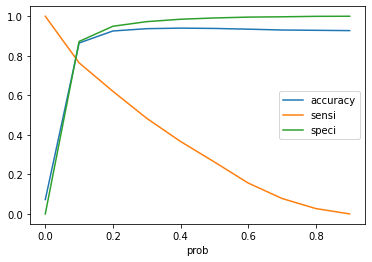

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

It seems cutt off rate is 0.25

#### PCA 

In [165]:
pca = PCA(random_state=1)

In [ ]:
pca.fit(Xtrain)

PCA(random_state=1)

In [ ]:
pca.components_
## these are the new basis

array([[ 1.07642121e-01,  1.17237830e-01,  1.34667914e-01, ...,
        -2.10890664e-02, -3.02411296e-02, -2.33079027e-02],
       [ 8.61240294e-02,  1.09027649e-01,  9.06669769e-02, ...,
        -8.55733600e-02, -7.68739290e-02, -8.85402587e-02],
       [-5.58271652e-03,  1.53234413e-02,  4.19414864e-02, ...,
         2.13369034e-01,  1.82114480e-01,  1.61114806e-01],
       ...,
       [-1.71245962e-03,  1.88502450e-03,  1.94952483e-03, ...,
         1.16766235e-03,  1.75766841e-03, -2.31098463e-03],
       [-4.28054880e-03,  8.63272135e-03,  5.30274753e-03, ...,
         1.86448082e-03,  1.80506230e-03, -8.04674681e-05],
       [ 2.93966926e-03,  9.08570114e-03,  6.44748779e-03, ...,
         3.35759065e-04,  1.25318848e-03, -7.04881444e-04]])

In [ ]:
# checked variance of 
pca.explained_variance_ratio_

array([2.34131266e-01, 1.76570935e-01, 6.84274814e-02, 5.66716410e-02,
       4.54952331e-02, 4.12981267e-02, 2.87558898e-02, 2.57353329e-02,
       2.27556650e-02, 2.14418299e-02, 1.98339153e-02, 1.90201412e-02,
       1.11392699e-02, 1.09885774e-02, 1.04185232e-02, 1.03239681e-02,
       9.85796994e-03, 9.76165391e-03, 9.12702811e-03, 8.74767659e-03,
       8.60136070e-03, 7.77790496e-03, 7.47902942e-03, 7.09057227e-03,
       6.92927070e-03, 6.64831274e-03, 6.37158063e-03, 5.67792230e-03,
       5.54761779e-03, 5.24893573e-03, 5.16826911e-03, 4.52597951e-03,
       4.46056802e-03, 4.38252021e-03, 4.25411926e-03, 3.98433484e-03,
       3.81063183e-03, 3.76125906e-03, 3.73138052e-03, 3.27700583e-03,
       3.22652714e-03, 3.10449430e-03, 3.04854799e-03, 2.99947074e-03,
       2.80945443e-03, 2.68810588e-03, 2.63454549e-03, 2.46472464e-03,
       2.05589058e-03, 1.98959131e-03, 1.90790506e-03, 1.72978133e-03,
       1.72158309e-03, 1.52765397e-03, 1.39935424e-03, 1.35974518e-03,
      

In [ ]:
# cumulative sum 
val_cum=np.cumsum(pca.explained_variance_ratio_)

In [ ]:
val_cum

array([0.23413127, 0.4107022 , 0.47912968, 0.53580132, 0.58129656,
       0.62259468, 0.65135057, 0.67708591, 0.69984157, 0.7212834 ,
       0.74111732, 0.76013746, 0.77127673, 0.7822653 , 0.79268383,
       0.8030078 , 0.81286577, 0.82262742, 0.83175445, 0.84050212,
       0.84910348, 0.85688139, 0.86436042, 0.87145099, 0.87838026,
       0.88502857, 0.89140016, 0.89707808, 0.9026257 , 0.90787463,
       0.9130429 , 0.91756888, 0.92202945, 0.92641197, 0.93066609,
       0.93465042, 0.93846105, 0.94222231, 0.94595369, 0.9492307 ,
       0.95245723, 0.95556172, 0.95861027, 0.96160974, 0.96441919,
       0.9671073 , 0.96974185, 0.97220657, 0.97426246, 0.97625205,
       0.97815996, 0.97988974, 0.98161132, 0.98313898, 0.98453833,
       0.98589807, 0.98702272, 0.98809728, 0.98913884, 0.99016998,
       0.99117419, 0.99214169, 0.99298872, 0.99378146, 0.99454651,
       0.99529017, 0.99600878, 0.99672128, 0.99731863, 0.9978934 ,
       0.99844093, 0.99888152, 0.99922164, 0.9995039 , 0.99977

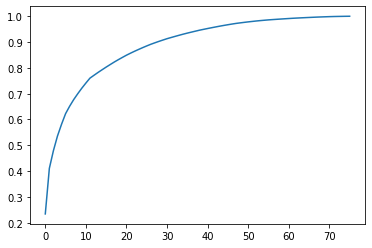

In [ ]:
plt.plot(range(0,len(val_cum)),val_cum)

we can see top 40 principle components will able to explain 95% variance of data.

In [166]:
# now pca with 40 componets
pca = PCA(n_components=40,random_state=1)
pca.fit(Xtrain)

PCA(n_components=40, random_state=1)

In [167]:
Xtrain_pca=pca.transform(Xtrain)
Xtest_pca=pca.transform(Xtest)

In [168]:
pca_cols = [f'pc_{i}' for i in range(1,41)]

In [169]:
Xtrain_pca=pd.DataFrame(columns=pca_cols,data=Xtrain_pca)
Xtest_pca=pd.DataFrame(columns=pca_cols,data=Xtest_pca)

##### Corelation after pca

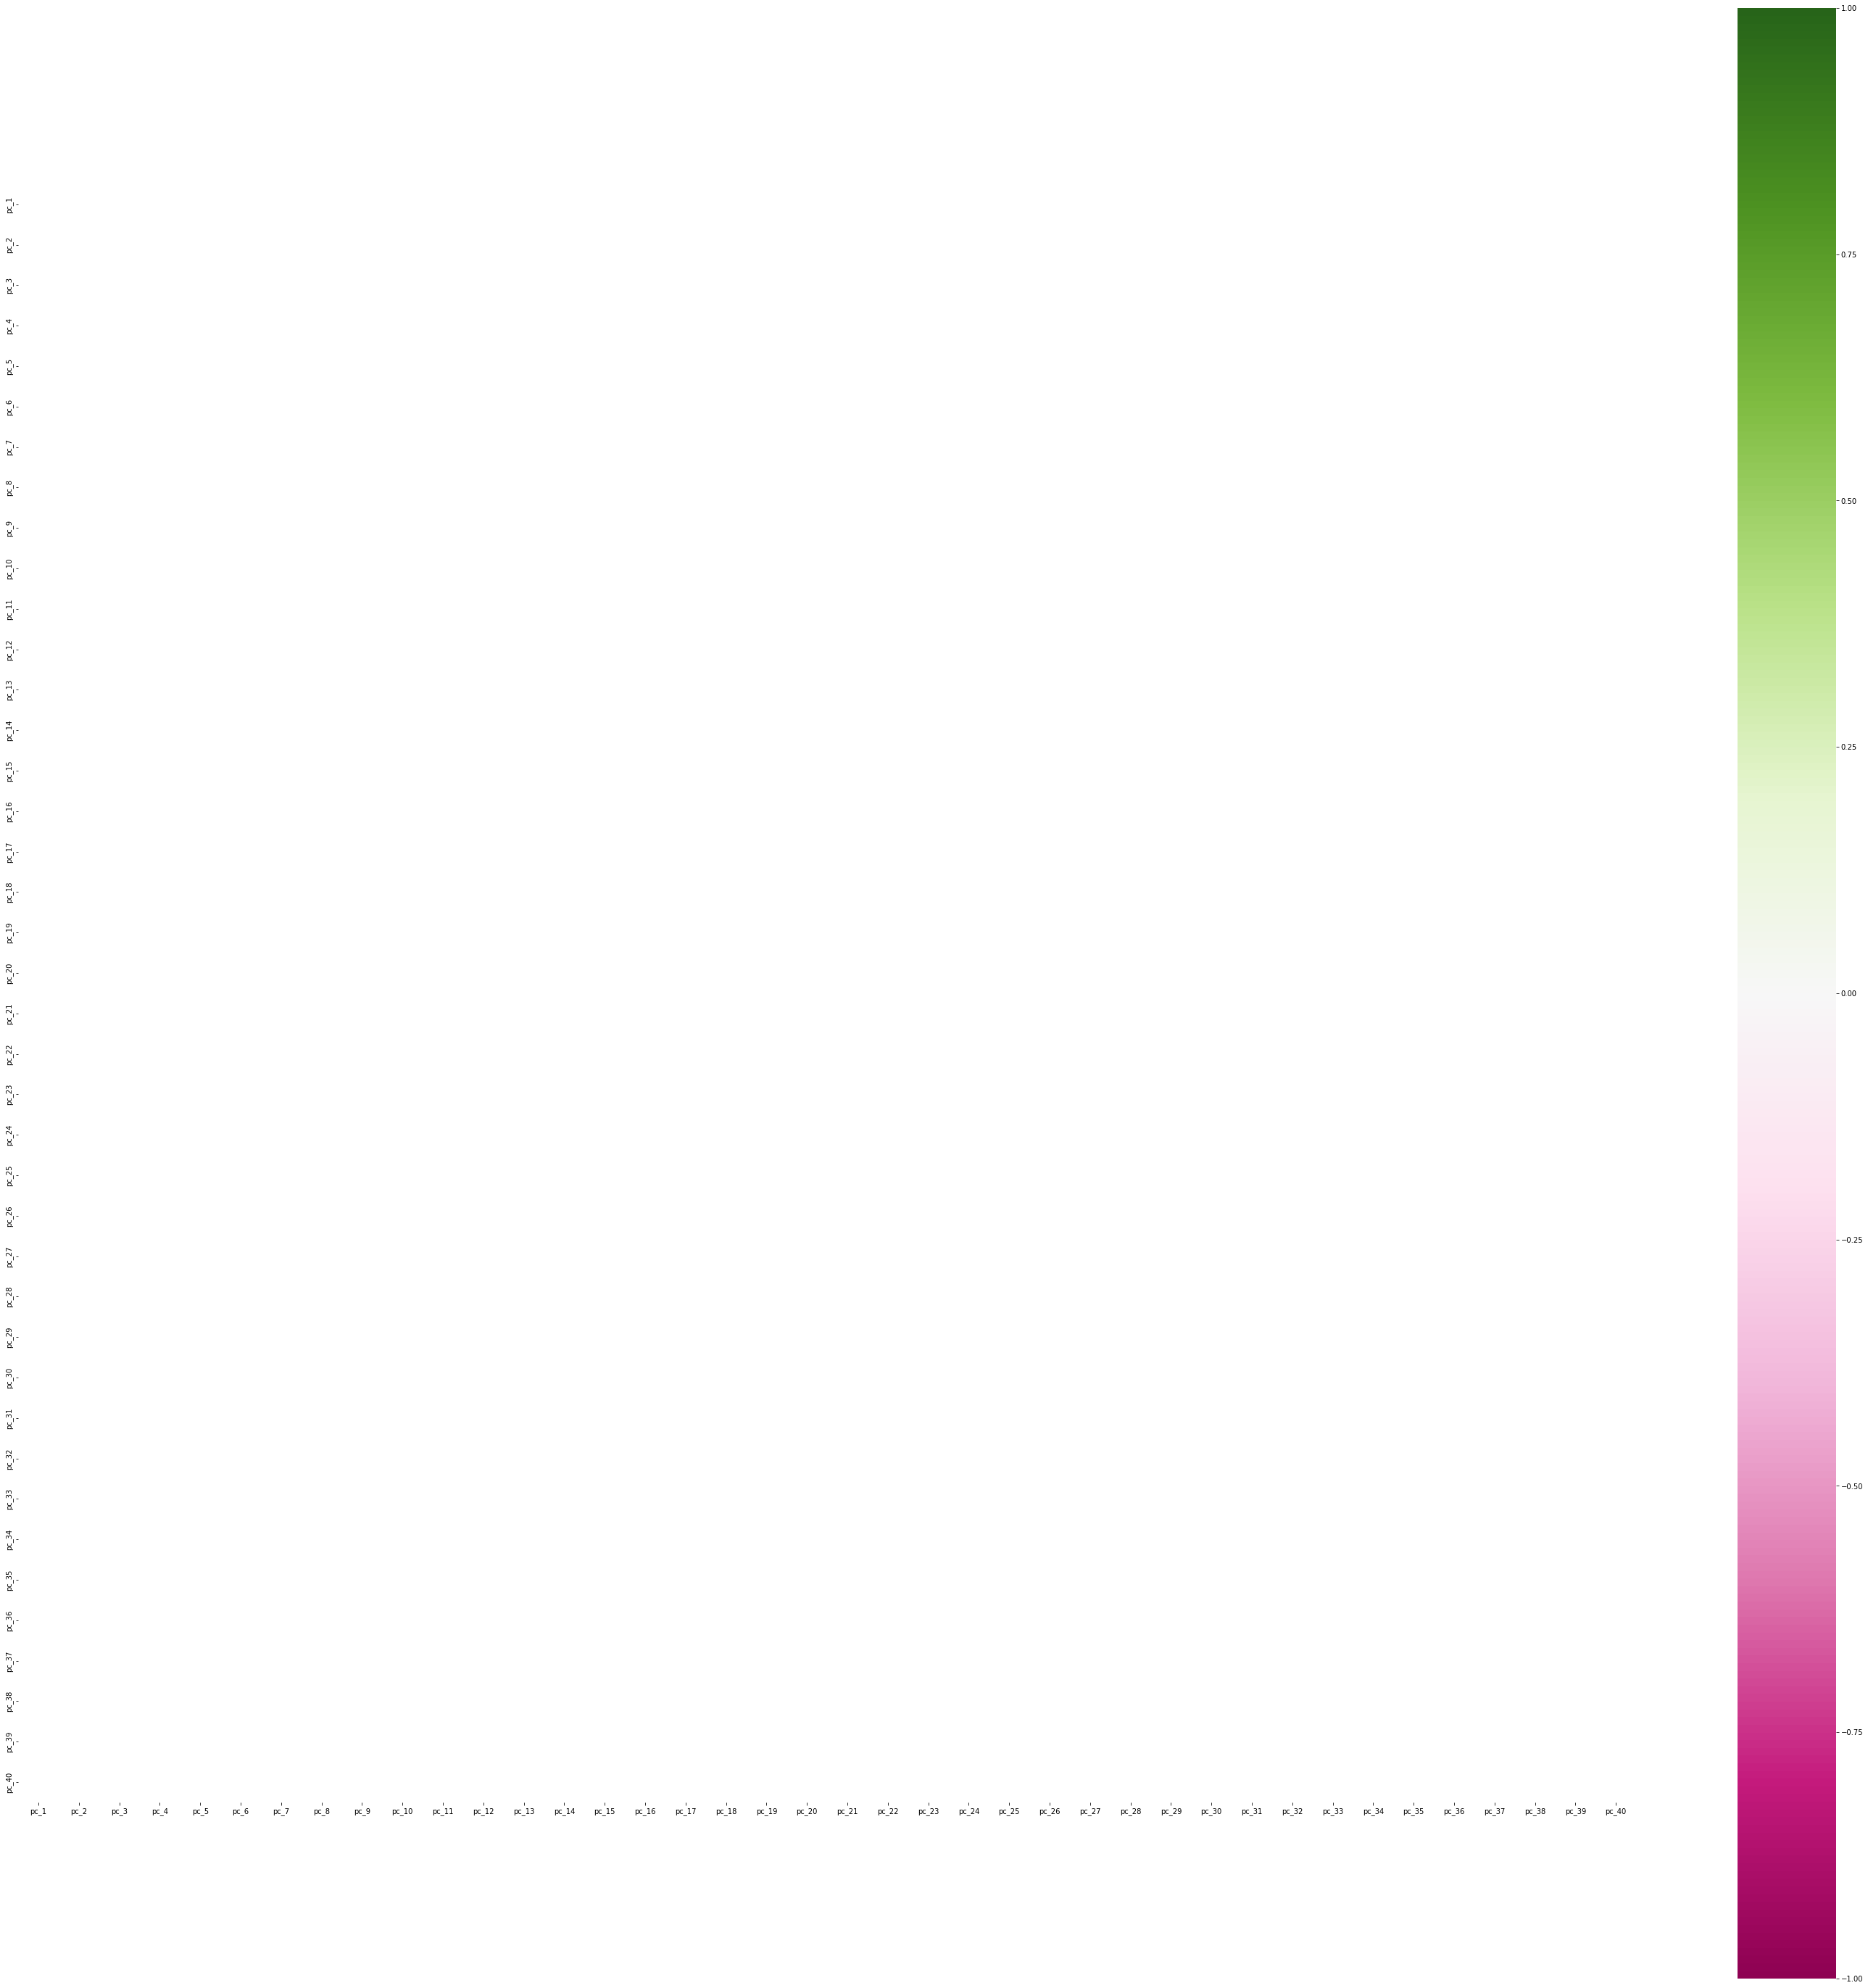

In [ ]:
display_corr_heatmap(Xtrain_pca)

 no correlation in new basis after doing pca.

In [ ]:
Xtrain_pca.head(5)

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28,pc_29,pc_30,pc_31,pc_32,pc_33,pc_34,pc_35,pc_36,pc_37,pc_38,pc_39,pc_40
0,-1.536600,6.128475,-0.730815,-4.608333,-1.156962,-1.357390,0.958427,-0.454609,-0.669417,1.406795,0.419263,0.003423,-0.114445,0.101706,0.062580,-0.172213,-0.765518,-0.487779,0.968570,0.000515,-0.794978,-0.232937,0.769529,0.005421,-0.178358,0.420079,1.802100,-0.000526,0.760436,-0.504238,0.122316,0.258274,0.462190,0.084844,0.132413,0.000682,0.320607,-0.534794,1.097294,-0.059321
1,9.188084,-2.198429,3.849743,-0.517390,-0.922266,0.192110,-0.430162,0.441873,-1.459242,0.369660,0.290300,-0.949237,-0.274697,0.556078,2.017109,-0.401632,-0.533405,-1.385384,-0.735269,0.590983,1.414650,0.814403,-1.300860,-0.866189,1.596818,-0.937587,1.163340,0.039507,-0.387759,0.880330,0.214938,0.044444,0.844145,-0.149809,0.610127,0.163986,0.206648,-0.393302,0.683295,0.036780
2,-0.929384,4.760812,1.224060,-2.149671,1.696402,1.255543,-2.293751,-0.269133,0.982575,0.641491,2.408452,-0.045548,1.235409,-0.369124,-0.162096,-0.659366,-0.051177,-0.146888,-0.548929,-0.745952,-0.029943,-1.559934,-0.484336,-0.696374,0.508635,0.404332,-0.692503,-1.346065,-0.199721,0.894924,0.528339,-0.269135,-0.287654,0.381686,-0.218954,-1.172756,1.108254,-0.941115,0.143518,0.812530
3,-0.517173,-0.546270,0.028420,3.348380,-1.271679,0.872341,0.185179,0.474805,-1.537508,-1.982482,0.954607,-0.068862,-1.391974,0.555773,-1.635226,2.225151,-1.662622,0.115486,-2.153159,0.183661,0.338126,-0.571380,-0.226366,0.401947,0.507275,-0.834082,0.510760,1.443267,0.244462,-0.012450,0.279773,-0.214407,-0.464776,0.230934,-0.953486,0.996177,0.098472,0.592377,-0.041690,-0.074203
4,0.712310,2.638655,0.527707,0.502720,-2.044353,3.459801,0.466618,0.279591,0.721556,-1.473787,-0.626546,-0.486555,0.649891,-1.252678,-0.467634,-0.992223,-0.341337,0.516797,1.435930,-0.401940,2.242832,-1.474705,0.573752,-0.293987,-1.357041,0.571907,-0.941944,0.445843,-0.358759,1.565949,-0.197275,-0.174764,0.605409,-0.424392,-0.299737,-0.828019,-0.110380,0.298799,0.695582,0.159572


#### Now Logistic Regression + PCA

In [ ]:
logis_pca = LogisticRegression(class_weight='balanced')

In [ ]:
logis_pca.fit(Xtrain_pca,ytrain)

LogisticRegression(class_weight='balanced')

In [ ]:
ytrain_pred=logis_pca.predict_proba(Xtrain_pca)[:,1]

In [ ]:
ytrain_pred.shape

(21380,)

In [ ]:
cut_off_df = get_cutoff(create_cutoff_pred(ytrain,ytrain_pred))
cut_off_df.head(10)

,prob,accuracy,sensi,speci
0.0,0.0,0.072732,1.000000,0.000000
0.1,0.1,0.364453,0.976206,0.316469
0.2,0.2,0.542891,0.944695,0.511375
0.3,0.3,0.663798,0.906752,0.644741
0.4,0.4,0.753695,0.861736,0.745221
0.5,0.5,0.820299,0.813505,0.820832
0.6,0.6,0.868101,0.749196,0.877427
0.7,0.7,0.901497,0.664309,0.920101
0.8,0.8,0.920954,0.540836,0.950769
0.9,0.9,0.929186,0.319614,0.976999


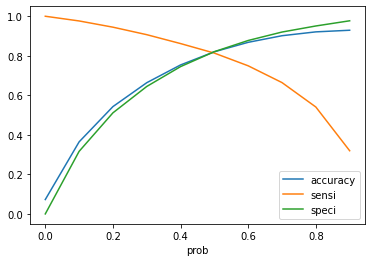

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cut_off_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

after setting class_weight , it is most probabale chance to have cut off 0.5.




In [ ]:
# printing metrices
print_score(estimator=logis_pca,X_train=Xtrain_pca,y_train=ytrain,X_test=Xtest_pca,y_test=ytest)

train accuracy :  0.8202993451824134
train precision :  0.26261158397342743
train recall :  0.8135048231511254
train specificity :  0.8208322824716268
train sensitivity :  0.8135048231511254
test accuracy :  0.8247298919567827
test precision :  0.2693817468105986
test recall :  0.8243243243243243
test specificity :  0.8247616805931505
test sensitivity :  0.8243243243243243


#### PCA + Adaboost

In [ ]:
params = {'n_estimators': [50,100,150,200,300,400],
          "learning_rate":[0.001,0.01,0.1,1.0]
          }

# Create a shallow tree as weak learner
# using class_weight to handle inbalance class dataset
tree_stump = DecisionTreeClassifier(max_depth=1,class_weight='balanced',random_state = 1)

ada_boost = AdaBoostClassifier(base_estimator=tree_stump,random_state=1)

# cross validation
folds=5
ada_boost_cv = GridSearchCV(estimator = ada_boost,
                        param_grid = params, 
                        scoring= 'accuracy',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

ada_boost_cv.fit(Xtrain_pca, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_depth=1,
                                                                                random_state=1),
                                          random_state=1),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150, 200, 300, 400]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# best param but no difference much of accuracy if we choose 300 estimator
ada_boost_cv.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [ ]:
ada_boost_cv_df = pd.DataFrame(ada_boost_cv.cv_results_)
ada_boost_cv_df.sort_values(by=['rank_test_score']).head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,6.399225,0.520502,0.052521,0.009616,0.01,50,"{'learning_rate': 0.01, 'n_estimators': 50}",0.847521,0.872311,0.878391,0.845884,0.873246,0.863471,0.013856,1,0.844598,0.872018,0.874766,0.856934,0.875935,0.864850,0.012210
23,51.252301,0.568514,0.396755,0.086330,1.0,400,"{'learning_rate': 1.0, 'n_estimators': 400}",0.859682,0.857109,0.855940,0.854771,0.858513,0.857203,0.001754,2,0.887278,0.879326,0.884413,0.879619,0.884296,0.882986,0.003063
0,6.407056,0.217329,0.052321,0.009456,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.839336,0.847287,0.889149,0.846586,0.847755,0.854022,0.017830,3,0.838050,0.848164,0.885758,0.859390,0.848047,0.855882,0.016394
2,19.070885,0.436467,0.139330,0.028359,0.001,150,"{'learning_rate': 0.001, 'n_estimators': 150}",0.839336,0.847287,0.889149,0.846586,0.847755,0.854022,0.017830,3,0.838050,0.848164,0.885758,0.859390,0.848047,0.855882,0.016394
1,14.866558,3.887511,0.117931,0.018665,0.001,100,"{'learning_rate': 0.001, 'n_estimators': 100}",0.839336,0.847287,0.889149,0.846586,0.847755,0.854022,0.017830,3,0.838050,0.848164,0.885758,0.859390,0.848047,0.855882,0.016394
22,38.451934,0.320934,0.270868,0.052343,1.0,300,"{'learning_rate': 1.0, 'n_estimators': 300}",0.857577,0.856174,0.851263,0.848457,0.855940,0.853882,0.003448,6,0.881197,0.872778,0.875409,0.870557,0.876462,0.875281,0.003605


In [ ]:
# printing rf train & test score 
print_score(ada_boost_cv.best_estimator_,Xtrain_pca,ytrain,Xtest_pca,ytest)

train accuracy :  0.8728250701590271
train precision :  0.2944915254237288
train recall :  0.5363344051446945
train specificity :  0.89921815889029
train sensitivity :  0.5363344051446945
test accuracy :  0.8743861180835971
test precision :  0.29501267962806427
test recall :  0.524024024024024
test specificity :  0.9018477109568083
test sensitivity :  0.524024024024024


#### PCA + RandomForest

In [ ]:
params = {'n_estimators': [100,200,300],
          "max_depth":[8,11,13],
          "min_samples_leaf":[4],
          "n_jobs":[-1]
          }


# using class_weight to handle inbalance class dataset
rclf = RandomForestClassifier(class_weight='balanced')

# cross validation
folds=5
rclf_cv = GridSearchCV(estimator = rclf,
                        param_grid = params, 
                        scoring= 'accuracy',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

rclf_cv.fit(Xtrain_pca, ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [8, 11, 13], 'min_samples_leaf': [4],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-1]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
rclf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:

rclf_cv.best_params_

{'max_depth': 13, 'min_samples_leaf': 4, 'n_estimators': 300, 'n_jobs': -1}

In [ ]:
rclf_cv_df = pd.DataFrame(rclf_cv.cv_results_)
rclf_cv_df.sort_values(by=['rank_test_score']).head(100)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,23.279462,1.140072,0.198347,0.017898,13,4,300,-1,"{'max_depth': 13, 'min_samples_leaf': 4, 'n_es...",0.934284,0.928906,0.924696,0.930543,0.928438,0.929373,0.003113,1,0.974392,0.975620,0.976672,0.974567,0.974860,0.975222,0.000838
7,15.733046,0.399536,0.165611,0.035311,13,4,200,-1,"{'max_depth': 13, 'min_samples_leaf': 4, 'n_es...",0.933817,0.928906,0.926333,0.929373,0.927736,0.929233,0.002521,2,0.975094,0.974567,0.976672,0.974100,0.976380,0.975362,0.001005
6,7.552783,1.101335,0.072177,0.006844,13,4,100,-1,"{'max_depth': 13, 'min_samples_leaf': 4, 'n_es...",0.935220,0.927970,0.925631,0.928438,0.927035,0.928859,0.003322,3,0.972287,0.973632,0.975971,0.973690,0.973866,0.973889,0.001184
5,21.771656,0.373966,0.251659,0.053536,11,4,300,-1,"{'max_depth': 11, 'min_samples_leaf': 4, 'n_es...",0.929841,0.923527,0.924228,0.924930,0.925631,0.925631,0.002219,4,0.961646,0.962640,0.965564,0.963050,0.962757,0.963131,0.001305
4,14.601020,0.107271,0.126214,0.005438,11,4,200,-1,"{'max_depth': 11, 'min_samples_leaf': 4, 'n_es...",0.930543,0.923059,0.920720,0.922123,0.925398,0.924369,0.003442,5,0.961296,0.962699,0.963108,0.961763,0.962114,0.962196,0.000646
3,7.370248,0.515573,0.079174,0.019141,11,4,100,-1,"{'max_depth': 11, 'min_samples_leaf': 4, 'n_es...",0.928672,0.921188,0.922825,0.922123,0.922591,0.923480,0.002656,6,0.960945,0.961120,0.964102,0.961646,0.960711,0.961705,0.001237
2,17.931632,0.760006,0.187867,0.036508,8,4,300,-1,"{'max_depth': 8, 'min_samples_leaf': 4, 'n_est...",0.915108,0.906455,0.907624,0.905051,0.909495,0.908746,0.003498,7,0.929958,0.930484,0.931829,0.931887,0.932297,0.931291,0.000904
0,6.361723,0.747469,0.066843,0.010425,8,4,100,-1,"{'max_depth': 8, 'min_samples_leaf': 4, 'n_est...",0.913471,0.905753,0.910898,0.902245,0.910430,0.908559,0.004021,8,0.931303,0.930718,0.933057,0.928087,0.932238,0.931080,0.001696
1,11.986970,0.687840,0.126456,0.025833,8,4,200,-1,"{'max_depth': 8, 'min_samples_leaf': 4, 'n_est...",0.916277,0.903882,0.905519,0.905285,0.906922,0.907577,0.004455,9,0.928730,0.929841,0.929841,0.932121,0.933115,0.930730,0.001625


In [ ]:
# printing rf train & test score 
print_score(rclf_cv.best_estimator_,Xtrain_pca,ytrain,Xtest_pca,ytest)

train accuracy :  0.9725444340505145
train precision :  0.7365591397849462
train recall :  0.9691318327974277
train specificity :  0.9728121059268601
train sensitivity :  0.9691318327974277
test accuracy :  0.933427916621194
test precision :  0.5466666666666666
test recall :  0.4924924924924925
test specificity :  0.9679887018947864
test sensitivity :  0.4924924924924925


#### GradBoost + PCA

In [ ]:
params = {'n_estimators': [800],
          "learning_rate":[0.001,0.01,0.1,1.0],
          "subsample":[0.7,0.8],
          "max_features":['sqrt','log2'],
          "max_depth":[8,11,13],
          }


# using class_weight to handle inbalance class dataset


gb = GradientBoostingClassifier()

# cross validation
folds=5
gb_boost_cv = GridSearchCV(estimator = gb,
                        param_grid = params, 
                        scoring= 'accuracy',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

gb_boost_cv.fit(Xtrain_pca, ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': [8, 11, 13],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [800], 'subsample': [0.7, 0.8]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
gb_boost_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 800,
 'subsample': 0.7}

In [ ]:
# printing rf train & test score
print_score(gb_boost_cv.best_estimator_,Xtrain_pca,ytrain,Xtest_pca,ytest)

#### Comparing Best Tuned Model

In [180]:
metics_df = pd.DataFrame(columns=['model_name','fpr','tpr','precision','recall','fpr_tpr_auc','precision_recall_auc'])

In [216]:
top_feature_df = pd.DataFrame(columns=['model_name','top_10_feature'])

In [181]:
def append_metrics(df,model_name,ytrue,ypred_prob) :
  fpr,tpr,_ = roc_curve(ytrue,ypred_prob)
  p,r,_ = precision_recall_curve(ytrue,ypred_prob)
  roc_auc_score_=roc_auc_score(ytrue,ypred_prob)
  p_r_auc=auc(r,p)
  df.loc[len(df.index)] = [model_name,fpr,tpr,p,r,roc_auc_score_,p_r_auc] 

In [217]:
def append_top_feature(df,model_name,cols,cols_imp_score) :
  model_imp_features=sorted(list(zip(list(cols),list(cols_imp_score))), key=lambda x:abs(x[1]), reverse=True)
  df.loc[len(df.index)] = [model_name,model_imp_features[0:10]]

##### AdaBoost Tuned Model

In [182]:
tree_stump = DecisionTreeClassifier(max_depth=1,class_weight='balanced',random_state = 1)
best_params={'learning_rate': 1.0, 'n_estimators': 400,'random_state':1,'base_estimator':tree_stump}
ada_boost = AdaBoostClassifier(**best_params)
ada_boost.fit(Xtrain,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   n_estimators=400, random_state=1)

In [183]:
# predicting proba
ypred_prob_ada=ada_boost.predict_proba(Xtest)[:,1]
append_metrics(metics_df,'adaboost_clf',ytest,ypred_prob_ada)

In [205]:
ada_boost.feature_importances_

array([0.01  , 0.0225, 0.015 , 0.01  , 0.02  , 0.005 , 0.02  , 0.01  ,
       0.025 , 0.0125, 0.015 , 0.0275, 0.015 , 0.0125, 0.02  , 0.0025,
       0.005 , 0.005 , 0.02  , 0.0125, 0.02  , 0.005 , 0.    , 0.0125,
       0.0125, 0.0025, 0.0075, 0.0225, 0.0025, 0.0075, 0.0075, 0.015 ,
       0.01  , 0.0125, 0.005 , 0.02  , 0.0225, 0.04  , 0.0075, 0.0025,
       0.03  , 0.02  , 0.015 , 0.0125, 0.    , 0.0075, 0.0125, 0.0375,
       0.005 , 0.0025, 0.0075, 0.005 , 0.0075, 0.01  , 0.0175, 0.0175,
       0.0075, 0.0225, 0.025 , 0.0375, 0.0125, 0.01  , 0.01  , 0.0125,
       0.01  , 0.025 , 0.0075, 0.0025, 0.0175, 0.0025, 0.0025, 0.0175,
       0.0175, 0.0025, 0.0075, 0.0225])

In [218]:
# adaboost important feature 
append_top_feature(top_feature_df,'adaboost',Xtrain.columns,ada_boost.feature_importances_)

##### GradBoost Tuned Model

In [138]:
best_params = {'learning_rate': 0.01,
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 800,
 'subsample': 0.7,
 'random_state':1
 }
gb = GradientBoostingClassifier(**best_params)
gb.fit(Xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features='sqrt',
                           n_estimators=800, random_state=1, subsample=0.7)

In [184]:
# predicting proba
ypred_prob_gb=gb.predict_proba(Xtest)[:,1]
append_metrics(metics_df,'gradientboost_clf',ytest,ypred_prob_gb)

In [219]:
# gradient important feature 
append_top_feature(top_feature_df,'gradientBoost',Xtrain.columns,gb.feature_importances_)

##### RandomForest Tuned Model

In [141]:
# rancom forest with best paramter
best_params = {'random_state':1,'n_estimators':300,'n_jobs':2,'class_weight':'balanced','max_depth':13}
rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(Xtrain,ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=300,
                       n_jobs=2, random_state=1)

In [185]:
# predicting proba
ypred_prob_rf=rf_clf.predict_proba(Xtest)[:,1]
append_metrics(metics_df,'randomforest_clf',ytest,ypred_prob_rf)

In [220]:
# randomforest important feature 
append_top_feature(top_feature_df,'randomforest',Xtrain.columns,rf_clf.feature_importances_)

##### Logistic Regressing Tuned Model

In [161]:
cols_for_logis

Index(['onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8',
       'loc_og_mou_7', 'std_og_t2t_mou_8', 'std_og_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'aon', 'last_rech_gap_month_8'],
      dtype='object')

In [186]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(Xtrain[cols_for_logis],ytrain)

LogisticRegression(class_weight='balanced')

In [187]:
# predicting proba
ypred_prob_logis=logreg.predict_proba(Xtest[cols_for_logis])[:,1]
append_metrics(metics_df,'logistic_regression_clf',ytest,ypred_prob_logis)

In [222]:
# randomforest important feature 
append_top_feature(top_feature_df,'logistic_regression_clf',cols_for_logis,logreg.coef_.reshape(-1))

##### AdaBoost+PCA Tuned Model

In [170]:
tree_stump_pca = DecisionTreeClassifier(max_depth=1,class_weight='balanced',random_state = 1)
best_params={'learning_rate': 0.01, 'n_estimators': 50,'random_state':1,'base_estimator':tree_stump_pca}
ada_boost_pca = AdaBoostClassifier(**best_params)
ada_boost_pca.fit(Xtrain_pca,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [188]:
# predicting proba
ypred_prob_ada_pca=ada_boost_pca.predict_proba(Xtest_pca)[:,1]
append_metrics(metics_df,'adaboost+pca_clf',ytest,ypred_prob_ada_pca)

##### GradientBoost+PCA Tuned Model

In [173]:
best_params={'learning_rate': 0.01,
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 800,
 'subsample': 0.7,
 'random_state':1
 }

gb_pca = GradientBoostingClassifier(**best_params)
gb_pca.fit(Xtrain_pca,ytrain)

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features='sqrt',
                           n_estimators=800, random_state=1, subsample=0.7)

In [189]:
# predicting proba
ypred_prob_gb_pca=gb_pca.predict_proba(Xtest_pca)[:,1]
append_metrics(metics_df,'gradientboost+pca_clf',ytest,ypred_prob_gb_pca)

##### RandomForest+PCA Tuned Model

In [176]:
# rancom forest with best paramter
best_params={'random_state':1,'max_depth': 13, 'min_samples_leaf': 4, 'n_estimators': 300, 'n_jobs': -1,'class_weight':'balanced'}
rf_clf_pca = RandomForestClassifier(**best_params)
rf_clf_pca.fit(Xtrain_pca,ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=13,
                       min_samples_leaf=4, n_estimators=300, n_jobs=-1,
                       random_state=1)

In [190]:
# predicting proba
ypred_prob_rf_pca=rf_clf_pca.predict_proba(Xtest_pca)[:,1]
append_metrics(metics_df,'randomforest+pca_clf',ytest,ypred_prob_rf_pca)

##### Logistic Regressor+PCA Tuned Model

In [178]:
logis_pca = LogisticRegression(class_weight='balanced')
logis_pca.fit(Xtrain_pca,ytrain)

LogisticRegression(class_weight='balanced')

In [191]:
# predicting proba
ypred_prob_logis_pca=logis_pca.predict_proba(Xtest_pca)[:,1]
append_metrics(metics_df,'logistic+pca_clf',ytest,ypred_prob_logis_pca)

##### Final Comparing

In [192]:
metics_df.head(10)

,model_name,fpr,tpr,precision,recall,fpr_tpr_auc,precision_recall_auc
0,adaboost_clf,"[0.0, 0.00011768859597505002, 0.00011768859597...","[0.0, 0.0, 0.015015015015015015, 0.01501501501...","[0.07350182099106059, 0.07339955849889625, 0.0...","[1.0, 0.9984984984984985, 0.9984984984984985, ...",0.881874,0.548502
1,gradientboost_clf,"[0.0, 0.0, 0.0, 0.00011768859597505002, 0.0001...","[0.0, 0.0015015015015015015, 0.003003003003003...","[0.07902230659705743, 0.0789130176812626, 0.07...","[1.0, 0.9984984984984985, 0.9984984984984985, ...",0.928169,0.621520
2,randomforest_clf,"[0.0, 0.0, 0.00011768859597505002, 0.000117688...","[0.0, 0.0015015015015015015, 0.001501501501501...","[0.07991360691144708, 0.07980319212768511, 0.0...","[1.0, 0.9984984984984985, 0.9984984984984985, ...",0.914175,0.575085
3,logistic_regression_clf,"[0.0, 0.0, 0.0, 0.00023537719195010004, 0.0002...","[0.0, 0.0015015015015015015, 0.004504504504504...","[0.07311450214073993, 0.07301273605621432, 0.0...","[1.0, 0.9984984984984985, 0.9984984984984985, ...",0.884657,0.481180
4,adaboost+pca_clf,"[0.0, 0.024714605154760504, 0.0323643638931387...","[0.0, 0.2972972972972973, 0.34984984984984985,...","[0.0726836189021063, 0.1158425832492432, 0.123...","[1.0, 0.8618618618618619, 0.8468468468468469, ...",0.778990,0.386284
5,gradientboost+pca_clf,"[0.0, 0.0, 0.00011768859597505002, 0.000117688...","[0.0, 0.0015015015015015015, 0.001501501501501...","[0.07679003804911795, 0.07668357933579335, 0.0...","[1.0, 0.9984984984984985, 0.9984984984984985, ...",0.908704,0.518078
6,randomforest+pca_clf,"[0.0, 0.0, 0.0, 0.00011768859597505002, 0.0001...","[0.0, 0.0015015015015015015, 0.003003003003003...","[0.0827946295375435, 0.08268059181897303, 0.08...","[1.0, 0.9984984984984985, 0.9984984984984985, ...",0.900248,0.494593
7,logistic+pca_clf,"[0.0, 0.00011768859597505002, 0.00035306578792...","[0.0, 0.0, 0.0, 0.006006006006006006, 0.006006...","[0.07408231368186874, 0.07397930804316387, 0.0...","[1.0, 0.9984984984984985, 0.9984984984984985, ...",0.888772,0.459726


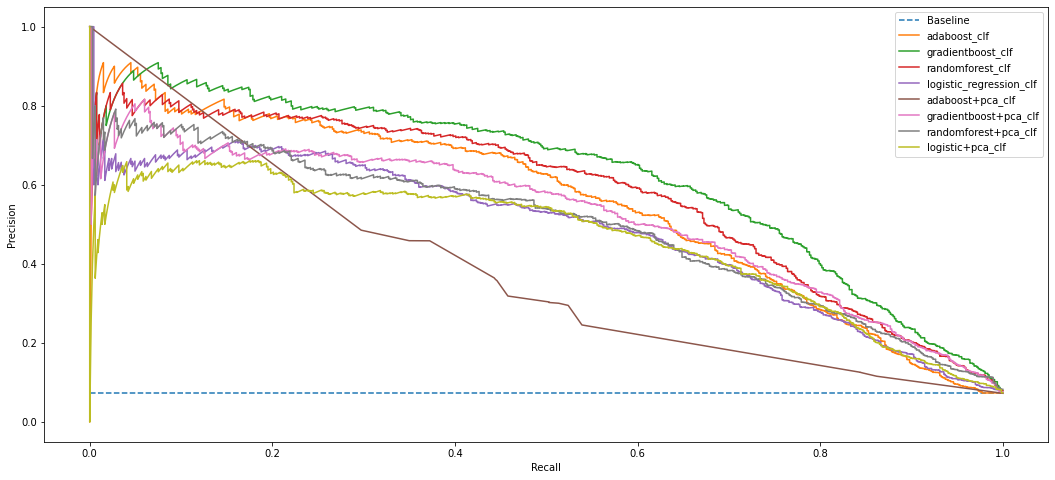

In [199]:
# Plot precision-recall curve

fig, ax = plt.subplots(figsize=(18,8))
baseline = len(ytest[ytest==1]) / len(ytest)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
for _,row in metics_df.iterrows() :
  ax.plot(row.recall, row.precision, label=row.model_name)

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='top right');

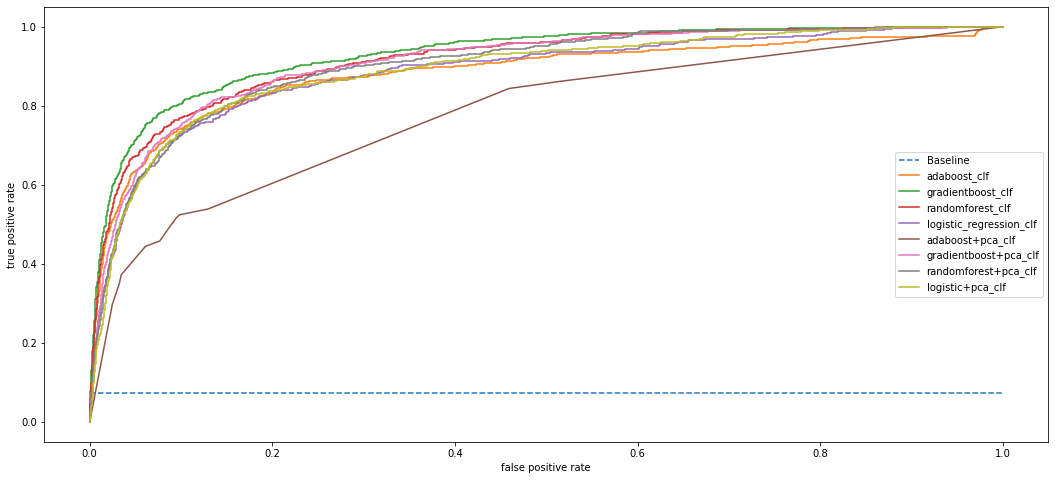

In [202]:
# Plot ROC AUC curve

fig, ax = plt.subplots(figsize=(18,8))
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
for _,row in metics_df.iterrows() :
  ax.plot(row.fpr, row.tpr, label=row.model_name)

ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.legend(loc='top right');

observation : 
1. Gradientboost perfomed is more stable model as per roc curv and precision recall curv
2. very low score adaboost+pca model.

##### Top Features

In [223]:
pd.set_option('display.max_colwidth', None)
top_feature_df.head(10,)

,model_name,top_10_feature
0,adaboost,"[(loc_ic_t2t_mou_7, 0.04), (loc_ic_mou_8, 0.0375), (total_ic_mou_8, 0.0375), (loc_ic_t2m_mou_7, 0.03), (loc_og_t2t_mou_8, 0.0275), (offnet_mou_8, 0.025), (total_ic_mou_7, 0.025), (total_rech_amt_8, 0.025), (arpu_7, 0.0225), (std_og_mou_6, 0.0225)]"
1,gradientBoost,"[(total_ic_mou_8, 0.07089146904957051), (total_og_mou_8, 0.05485701673926475), (arpu_8, 0.04289216063016042), (total_rech_amt_8, 0.041289429314740785), (max_rech_amt_8, 0.0382152081665307), (loc_ic_mou_8, 0.03344687000276153), (last_day_rch_amt_8, 0.02974336549458197), (loc_ic_t2m_mou_8, 0.028186351499359757), (last_rech_gap_month_8, 0.026677669602684674), (loc_og_mou_8, 0.021273808472825555)]"
2,randomforest,"[(total_ic_mou_8, 0.07564112483354507), (loc_ic_t2m_mou_8, 0.054224500599771686), (last_day_rch_amt_8, 0.05364059744490687), (loc_ic_mou_8, 0.04936064965454951), (total_rech_amt_8, 0.04553517804655639), (last_rech_gap_month_8, 0.04307185381445809), (total_og_mou_8, 0.041915208077493084), (arpu_8, 0.03756841651866774), (loc_og_mou_8, 0.03286982832006575), (loc_og_t2m_mou_8, 0.03266967428735041)]"
3,logistic_regression_clf,"[(total_ic_mou_8, -1.110491793908495), (last_rech_gap_month_8, 0.6012069604166763), (last_day_rch_amt_8, -0.5697297012165978), (loc_og_mou_7, -0.49836285721104523), (total_rech_amt_7, 0.4780738403137836), (total_rech_num_8, -0.36391041005573327), (aon, -0.28506098797774815), (onnet_mou_6, 0.2643212231808796), (std_ic_mou_8, 0.22798569882642317), (loc_ic_t2f_mou_8, -0.21763122693183848)]"


### Recommendation :

Most strogest indicators for churn customer

*  Total Incoming call of last month reduced by 7% to 11%, It is strogest indicator that customer is going to churn.
*  Decreasing of Last Day Recharge Amount is second strogest indicator.
* Other Indicator are reducing total recharge amount, high gap from last recharge in month etc.

##### Prediction test file 

In [200]:
# defining preprocessing step for test file
def predict_test(df,estimator) :
  date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
  # datetime conversion
  for col in date_cols :
    df[col]=pd.to_datetime(df[col])

  df['last_rech_gap_month_6'] = (df['last_date_of_month_6']-df['date_of_last_rech_6']).astype('timedelta64[D]')
  df['last_rech_gap_month_7'] = (df['last_date_of_month_7']-df['date_of_last_rech_7']).astype('timedelta64[D]')
  df['last_rech_gap_month_8'] = (df['last_date_of_month_8']-df['date_of_last_rech_8']).astype('timedelta64[D]')
  
  test_df_=df[Xtrain.columns.to_list()]

  test_df_[missing_median_replaced_col]=test_df_[missing_median_replaced_col].fillna(missing_median)

  ## scale the feature
  test_df_[features]=std_scaler.transform(test_df_[features])

  # prediction 
  y_pred=estimator.predict(test_df_)

  output_df = pd.DataFrame({"id":df.id,"churn_probability":y_pred})
  output_df['churn_probability']=output_df['churn_probability'].astype('int64')
  return output_df

In [ ]:
#  prediction with gradient boosting
test_churn_df=pd.read_csv("telecome_churn_test.csv")

In [ ]:
# adaboost submission
output_df=predict_test(test_churn_df,ada_boost_cv.best_estimator_)
output_df.to_csv('submission_adaboost.csv',index=False)

In [ ]:
# radom forest submission
output_df=predict_test(test_churn_df,rf_clf)
output_df.to_csv('submission_random.csv',index=False)